In [4]:
from Scripts.essentials import *
import h5py

In [5]:
# Load the data into a dictionary
data_path = "Data/Other/LarionData/SWCNTglass/"

data = []
data_names = []
for sample in os.listdir(data_path):
    with h5py.File(data_path + sample) as f:
        regions = f["Regions"]
        
        datasets = np.empty((0, 1738))
        for region in list(regions):
            datasets = np.concatenate((datasets, np.nan_to_num(normalize(np.array(regions[region]["Dataset"]).reshape(-1, 1738)))))
            
        data.append(datasets)
        data_names.append(sample)

(100, 1738)


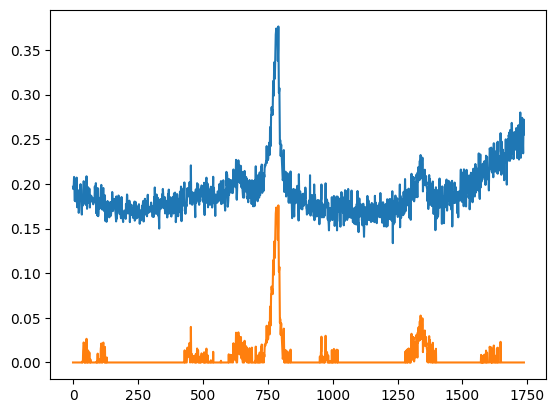

(400, 1738)


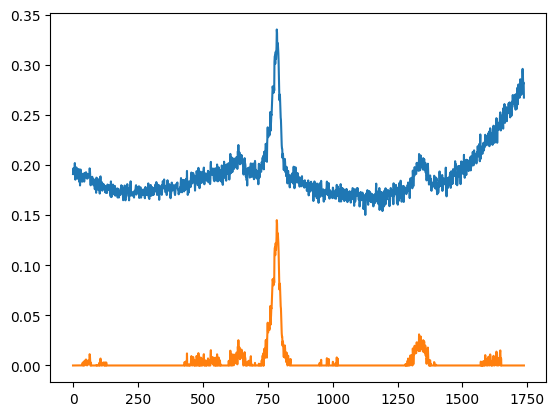

(400, 1738)


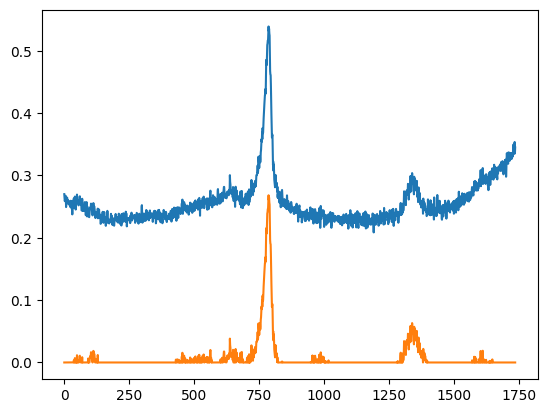

(400, 1738)


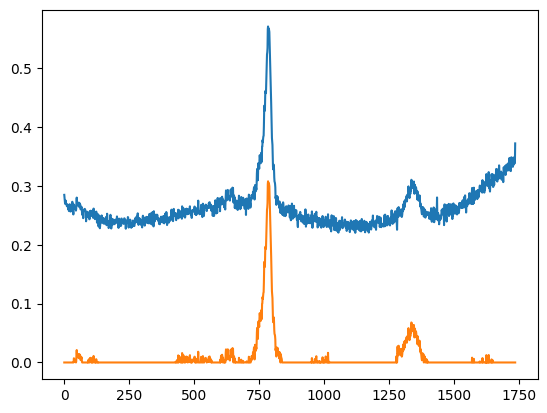

(400, 1738)


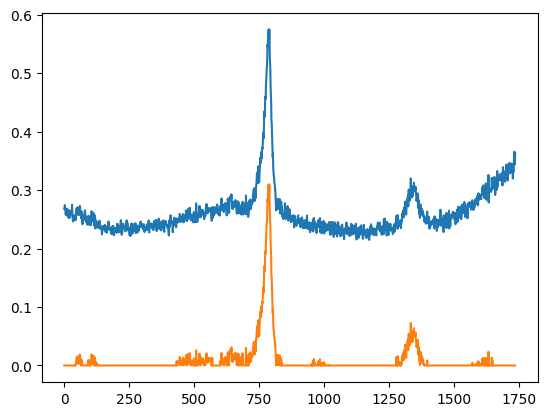

(400, 1738)


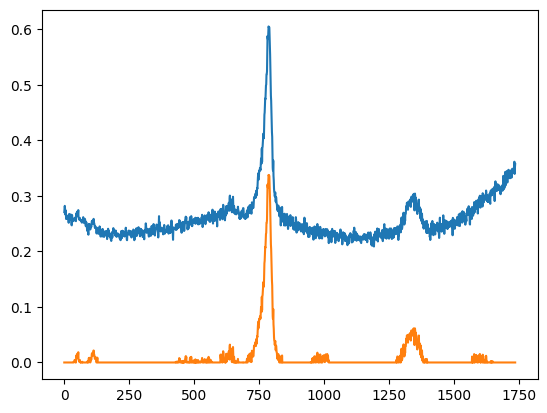

(400, 1738)


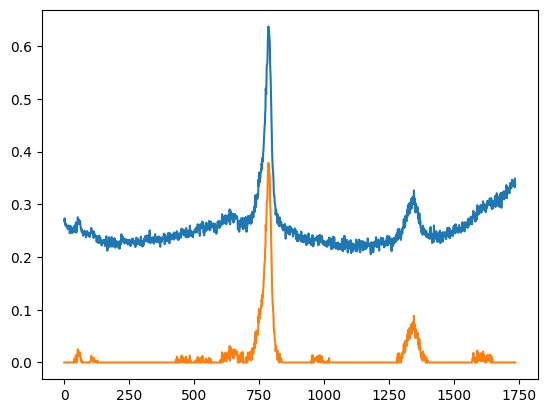

(400, 1738)


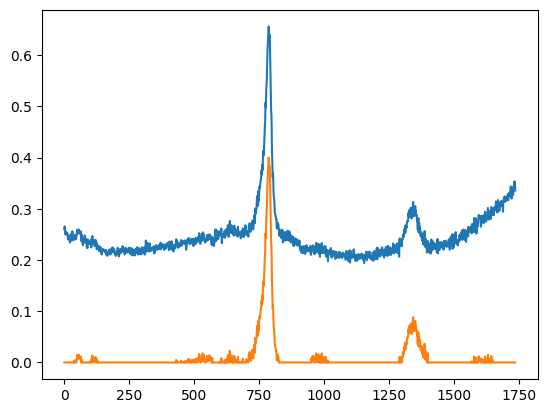

(400, 1738)


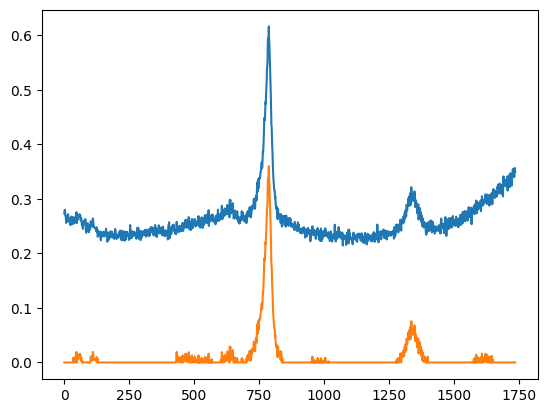

(400, 1738)


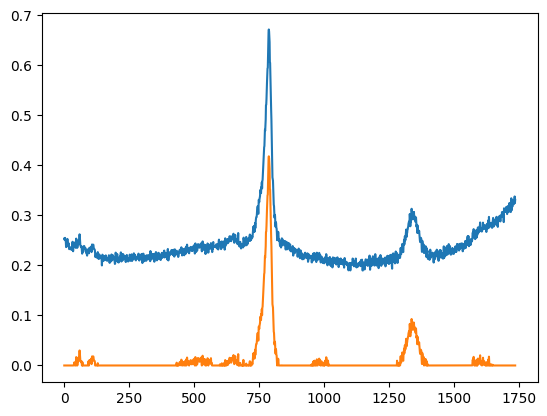

(400, 1738)


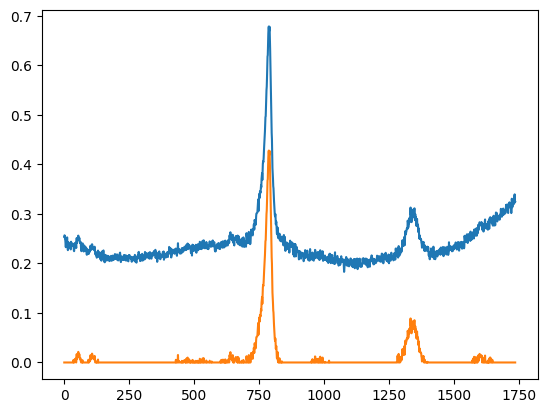

(400, 1738)


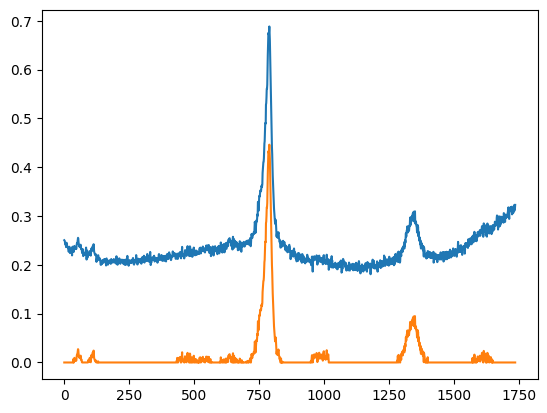

(400, 1738)


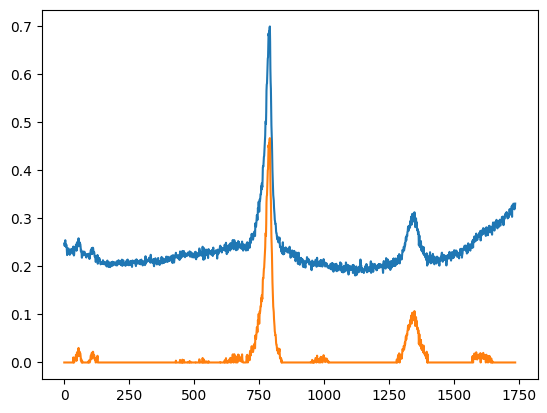

(400, 1738)


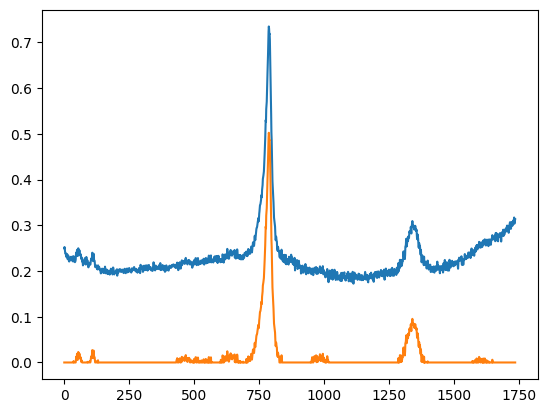

(400, 1738)


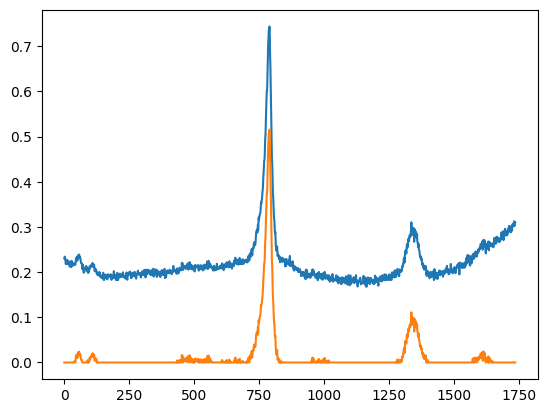

(400, 1738)


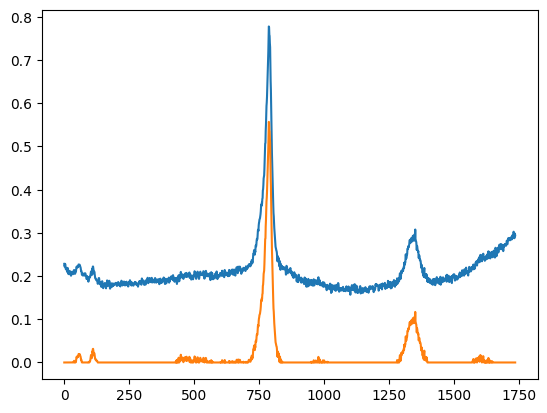

(400, 1738)


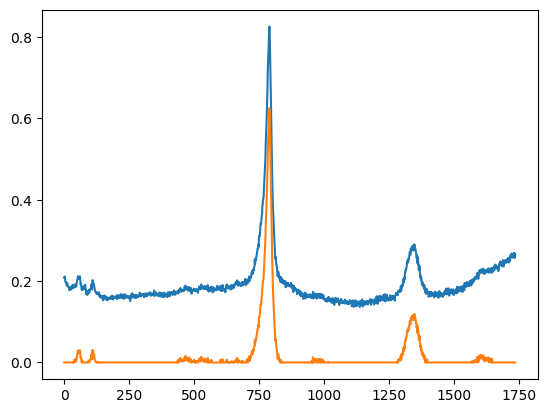

(400, 1738)


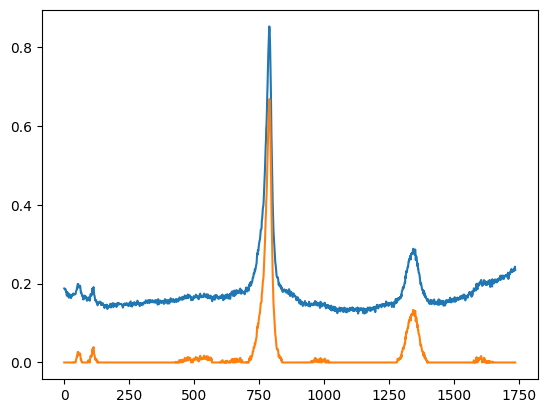

(400, 1738)


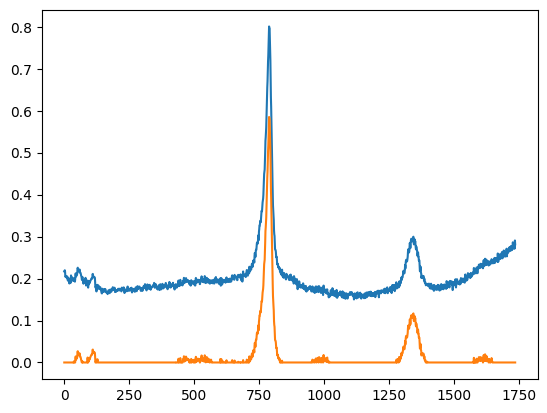

(400, 1738)


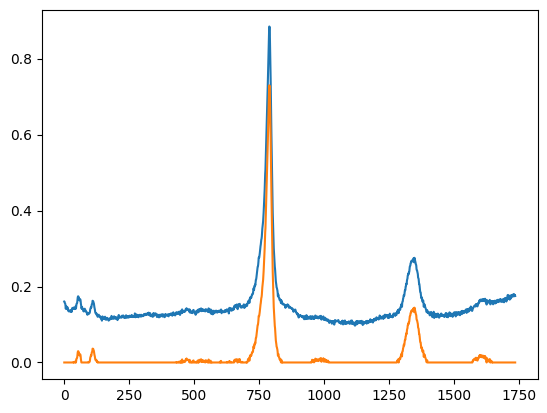

(400, 1738)


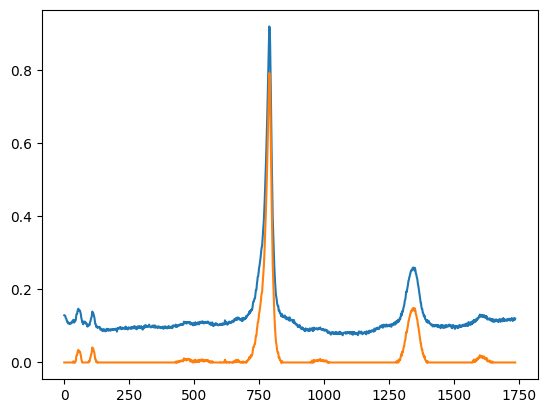

(400, 1738)


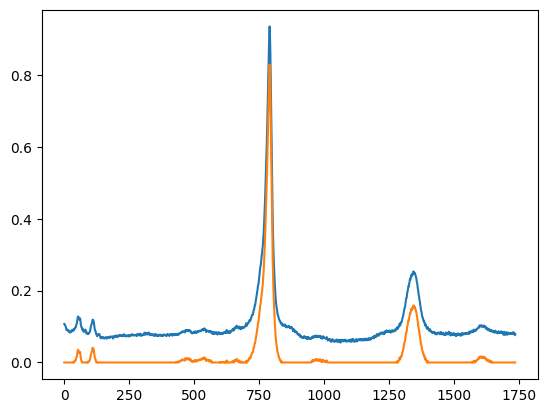

(400, 1738)


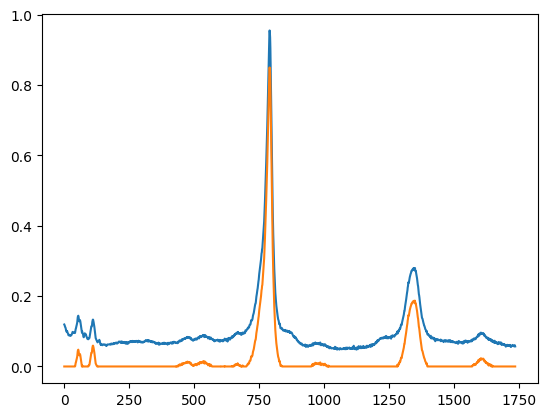

(400, 1738)


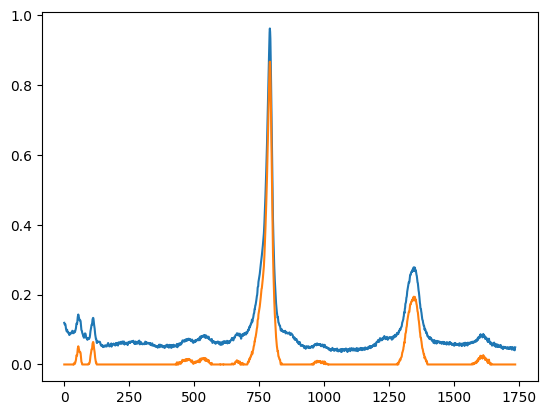

(400, 1738)


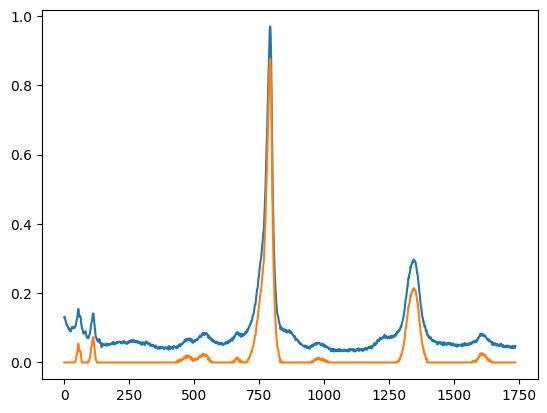

In [5]:
ranges = [[35, 70], [90, 130], [430, 570], [600, 690], [700, 840], [950, 1020], [1280, 1400], [1570, 1650]]
targets = []
for i in range(len(data)):
    print(data[i].shape)
    target = np.mean(np.array(np.nan_to_num(data[i])).reshape((-1, 1738)), axis = 0)
    new_target = np.zeros_like(target)
    # Get the peaks
    for r in ranges:
        peak = target[r[0]: r[1] + 1]
    
        
        start = np.median(peak[0:3])
        end = np.median(peak[-3:])
    
        # The baseline at peak location is a linear line between the medians of the left and right ends, estimated by the 10 first and last points
        bl = np.linspace(start, end, r[1] - r[0] + 1, axis = -1)
    
        # Remove the baseline
        new_peak = np.clip(peak - bl, 0, 1)
    
        # Insert the peak
        new_target[r[0]:r[1]+1] = new_peak
    plt.plot(target)
    plt.plot(new_target)
    plt.show()
    
    targets.append(new_target)

In [6]:
ensemble_model = make_ensemble()
ensemble_model.load_weights(filepath= "Models/ensembleModelRes.h5")

standard_model = make_standard()
standard_model.load_weights(filepath = "Models/standardModel.h5")

cascade = tf.keras.models.load_model("Models/unet_three.23-64.96.h5")

In [7]:
ensemble_preds = {}
standard_preds = {}

for d, n in zip(data, data_names):
        
    dn_1 = d.reshape((-1, 1738))
    print(n, dn_1.shape)
        
    denoised_1 = ensemble_model.predict(np.expand_dims(dn_1, -1))[-1]
    denoised_2 = standard_model.predict(np.expand_dims(dn_1, -1))[-1]
    
    ensemble_preds[n] = denoised_1
    standard_preds[n] = denoised_2


swcntglass0.00167s10umsize50umconfocal.h5 (100, 1738)
4/4 [==============================] - 1s 82ms/step
swcntglass0.00167s20umsize50umconfocal600hz.h5 (400, 1738)
13/13 [==============================] - 1s 84ms/step
swcntglass0.00174s20umsize50umconfocal575hz.h5 (400, 1738)
13/13 [==============================] - 1s 70ms/step
swcntglass0.00182s20umsize50umconfocal550hz.h5 (400, 1738)
13/13 [==============================] - 1s 71ms/step
swcntglass0.00190s20umsize50umconfocal525hz.h5 (400, 1738)
13/13 [==============================] - 1s 70ms/step
swcntglass0.00222s20umsize50umconfocal450hz.h5 (400, 1738)
13/13 [==============================] - 1s 70ms/step
swcntglass0.00250s20umsize50umconfocal400hz.h5 (400, 1738)
13/13 [==============================] - 1s 71ms/step
swcntglass0.00286s20umsize50umconfocal350hz.h5 (400, 1738)
13/13 [==============================] - 1s 71ms/step
swcntglass0.002s20umsize50umconfocal500hz.h5 (400, 1738)
13/13 [==============================] - 1s 71

In [8]:

casc_preds = {}
for d, n in zip(data, data_names):
    print(n)
        
    dn_1 = d.reshape((-1, 1738)) * 1000
        
        # Model is designed for spectrum length 1024, split the spectrum in half 
    denoised_1 = np.squeeze(cascade.predict(np.expand_dims(dn_1[:, :1024], -1))[-1]/1000)
    denoised_2 = np.squeeze(cascade.predict(np.expand_dims(dn_1[:, -1024 :], -1))[-1]/1000)
        
        #Join the predictions in the middle
    denoised = np.hstack((denoised_1[:, : 1738 - 1024], denoised_2))
        
    casc_preds[n] = denoised

swcntglass0.00167s10umsize50umconfocal.h5
4/4 [==============================] - 0s 82ms/step
swcntglass0.00167s20umsize50umconfocal600hz.h5
13/13 [==============================] - 1s 85ms/step
swcntglass0.00174s20umsize50umconfocal575hz.h5
13/13 [==============================] - 1s 86ms/step
swcntglass0.00182s20umsize50umconfocal550hz.h5
13/13 [==============================] - 1s 85ms/step
swcntglass0.00190s20umsize50umconfocal525hz.h5
13/13 [==============================] - 1s 86ms/step
swcntglass0.00222s20umsize50umconfocal450hz.h5
13/13 [==============================] - 1s 85ms/step
swcntglass0.00250s20umsize50umconfocal400hz.h5
13/13 [==============================] - 1s 85ms/step
swcntglass0.00286s20umsize50umconfocal350hz.h5
13/13 [==============================] - 1s 85ms/step
swcntglass0.002s20umsize50umconfocal500hz.h5
13/13 [==============================] - 1s 85ms/step
swcntglass0.00333s20umsize50umconfocal300hz.h5
13/13 [==============================] - 1s 85ms/step

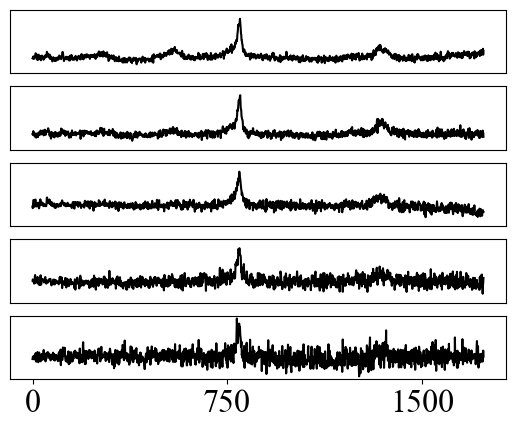

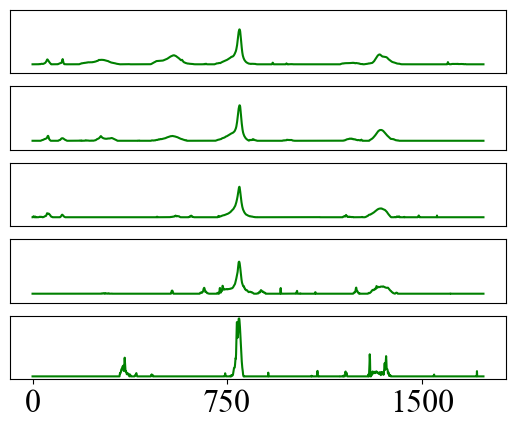

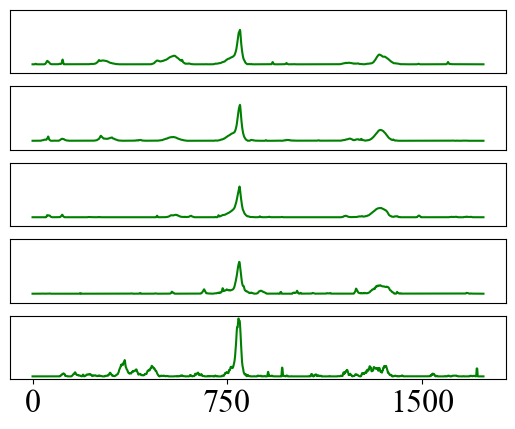

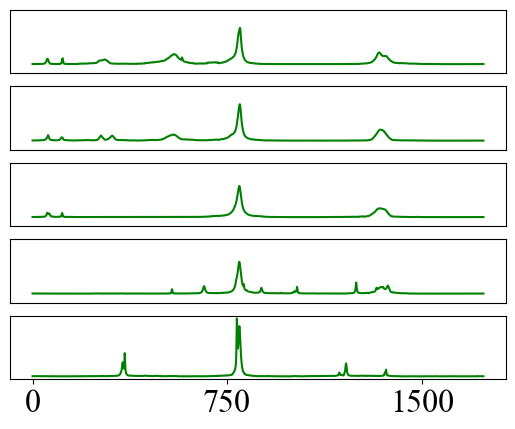

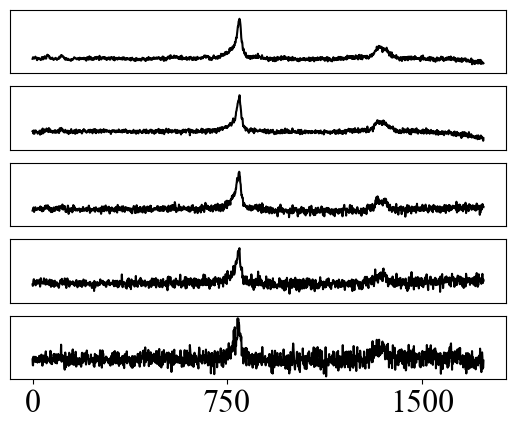

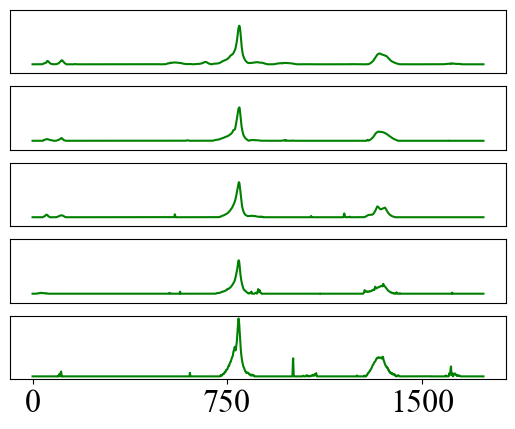

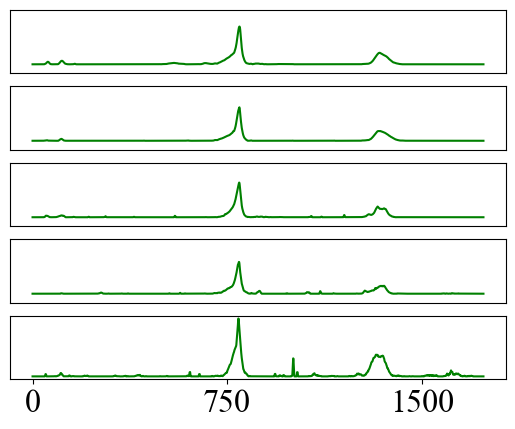

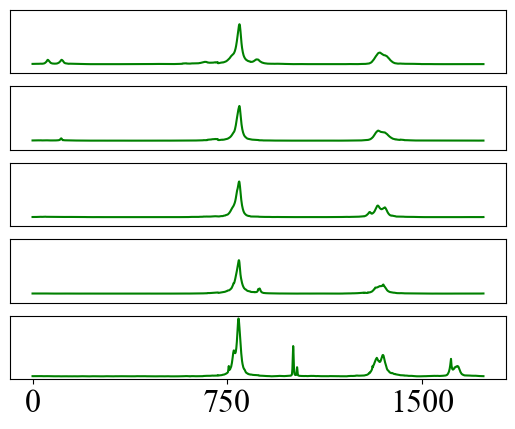

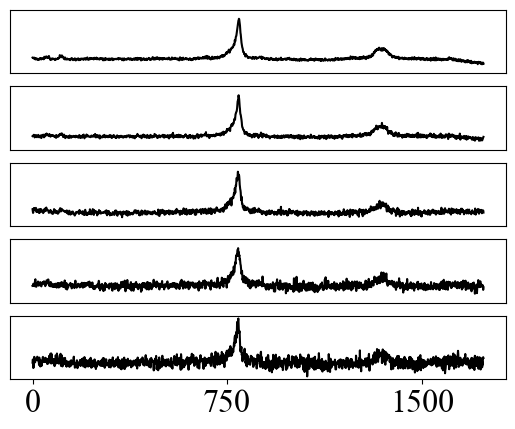

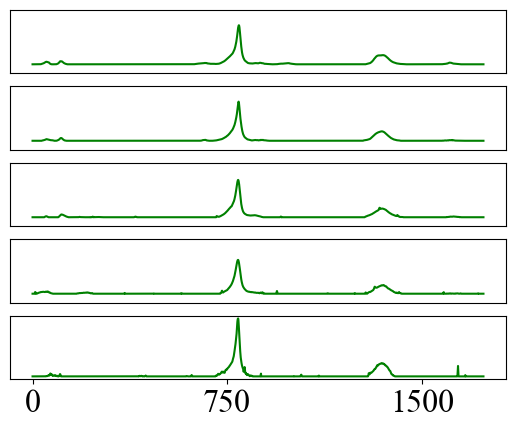

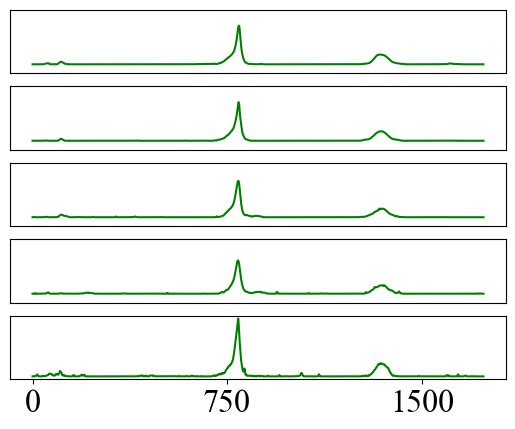

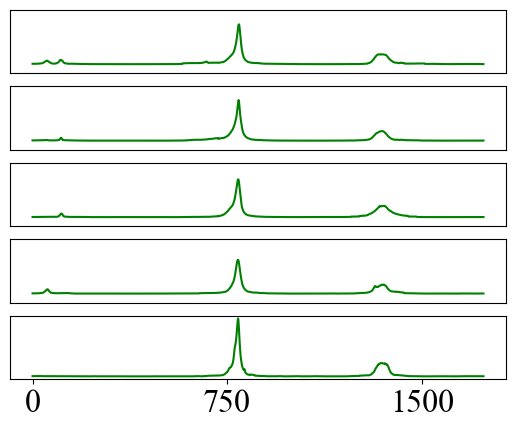

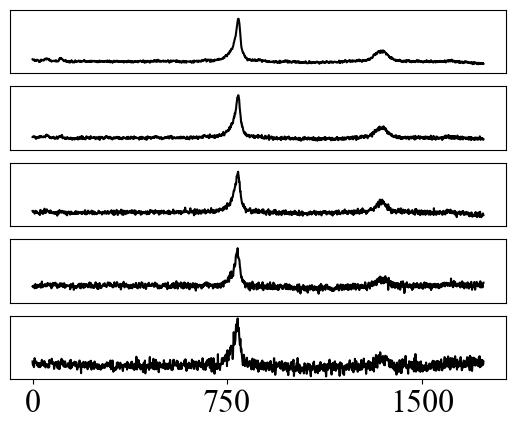

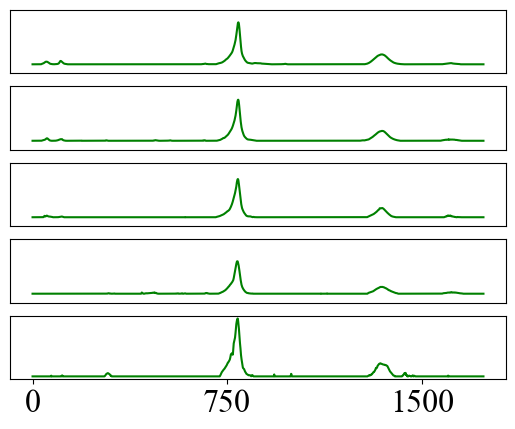

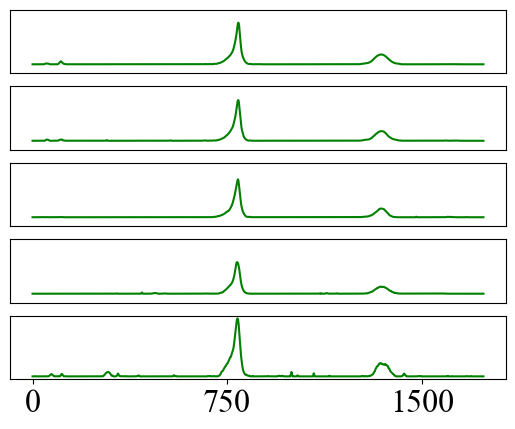

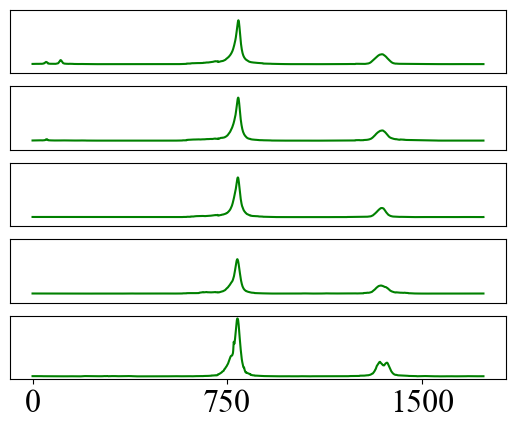

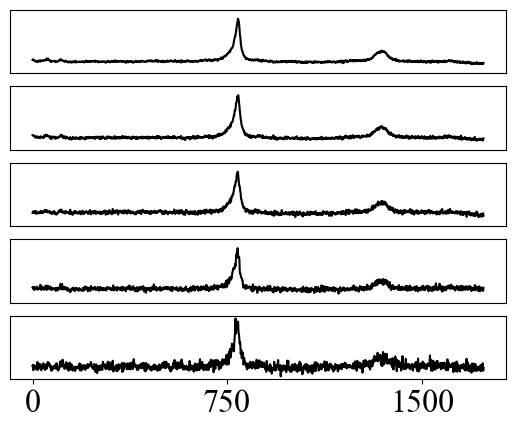

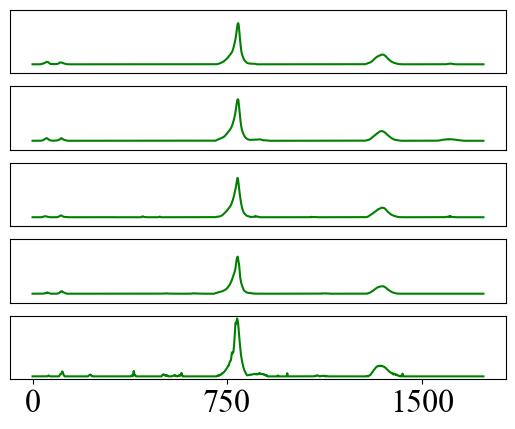

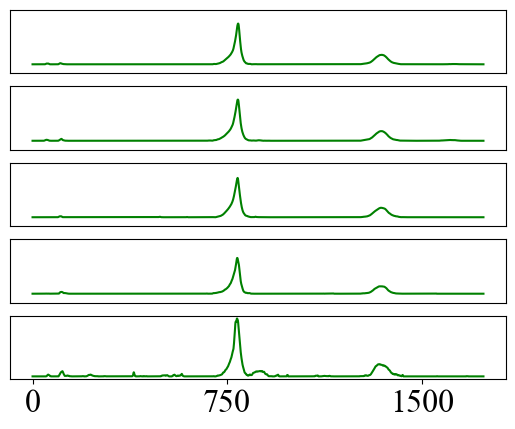

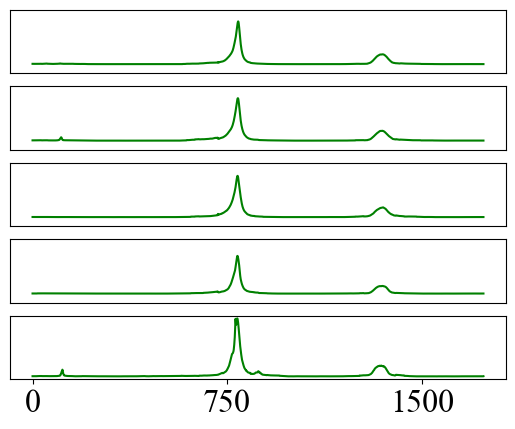

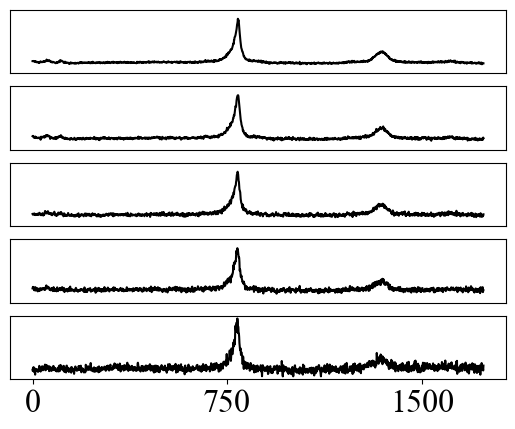

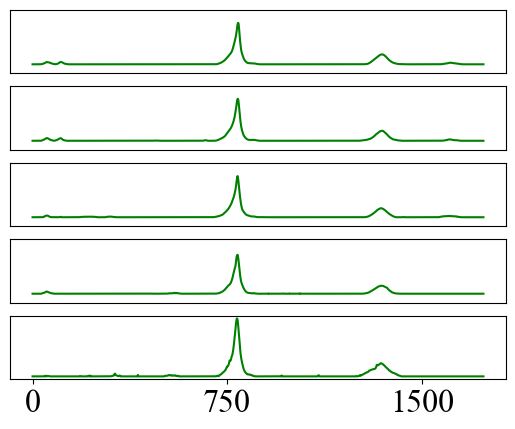

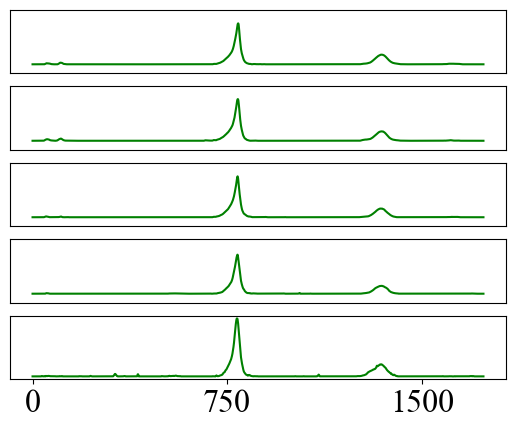

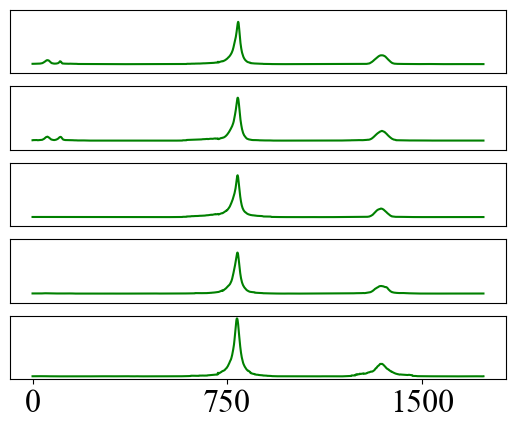

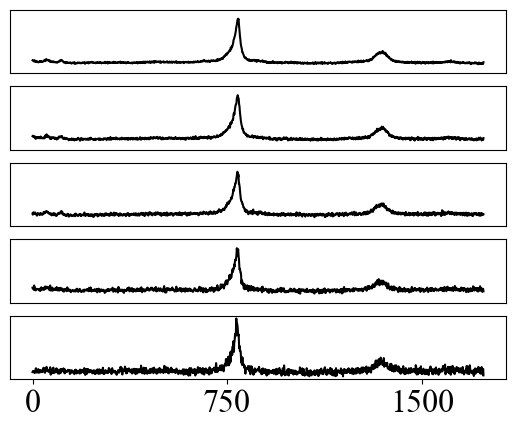

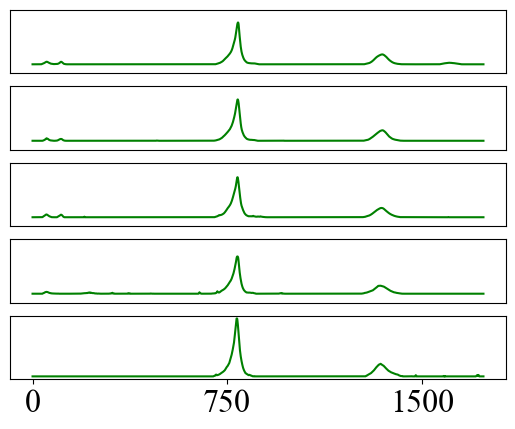

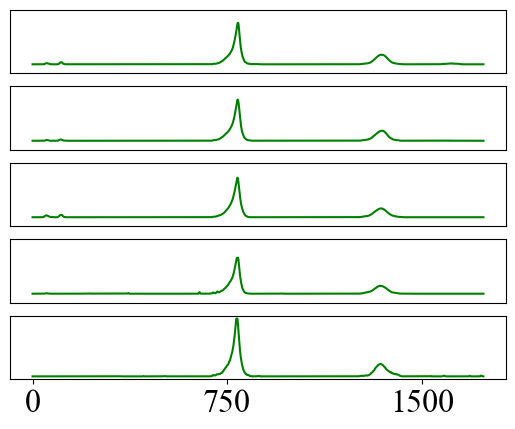

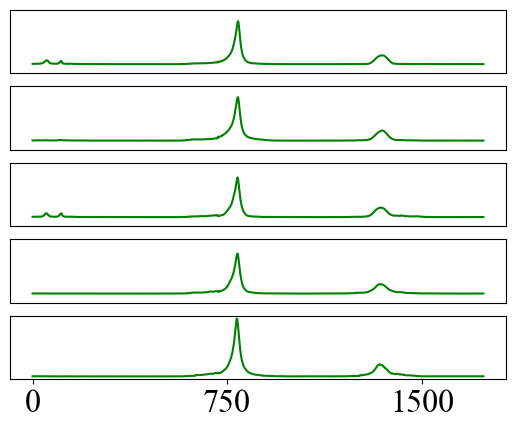

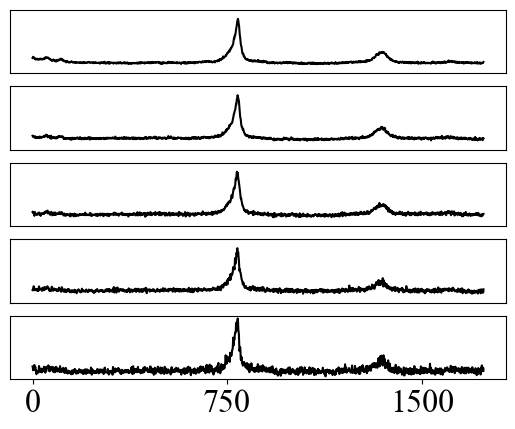

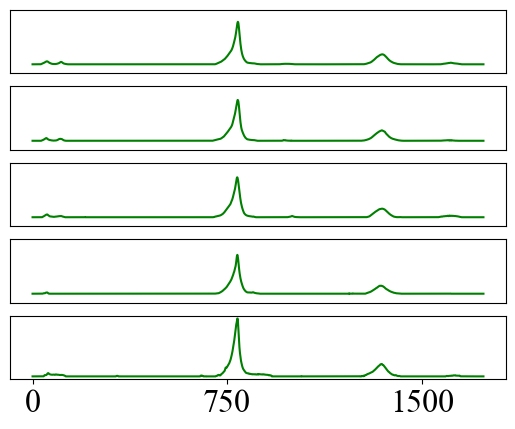

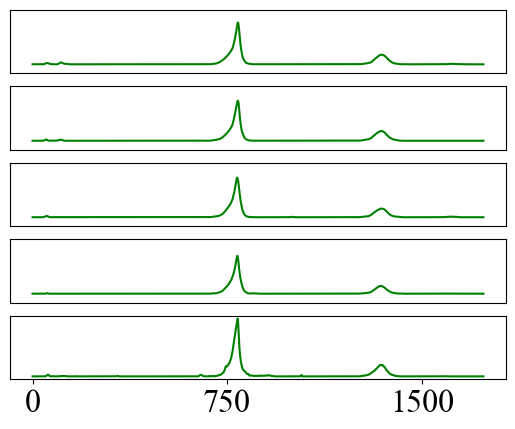

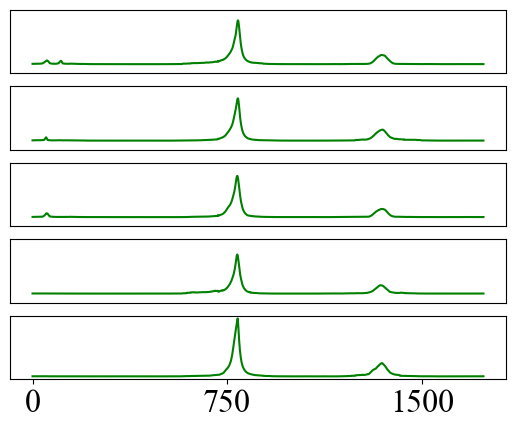

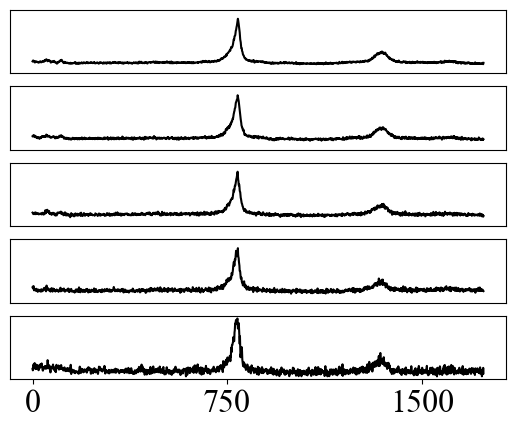

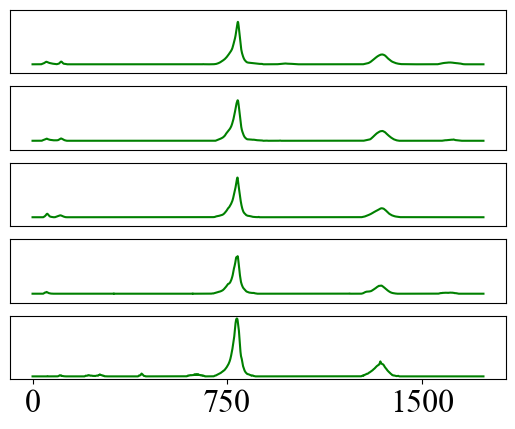

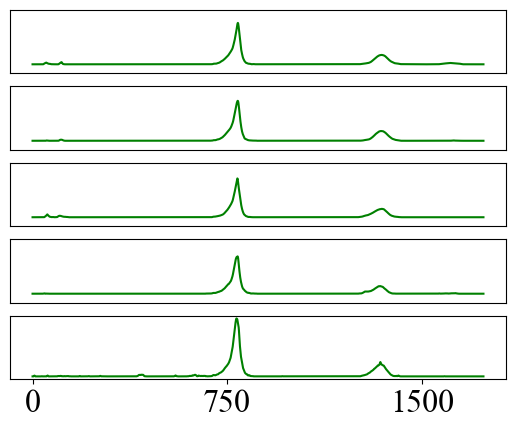

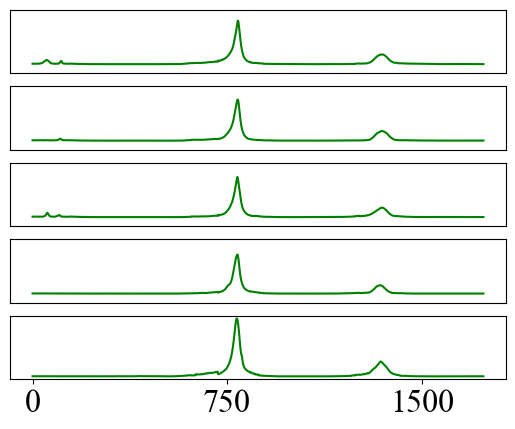

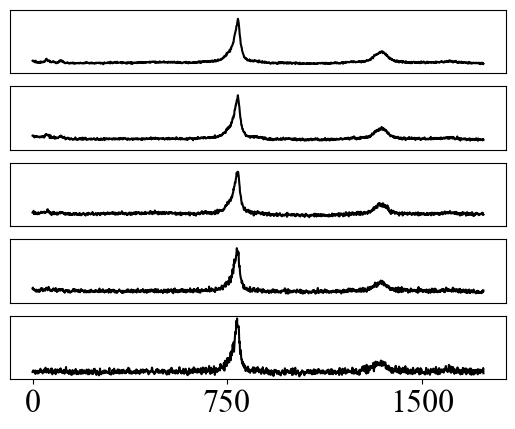

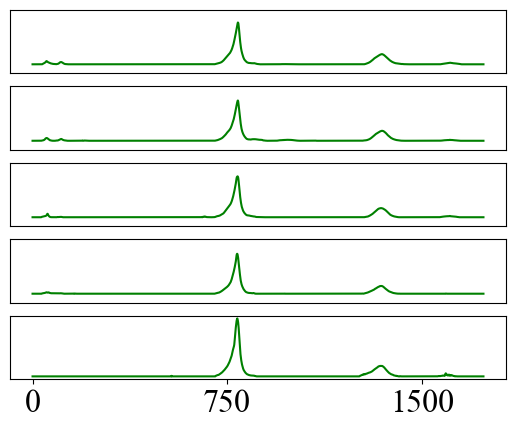

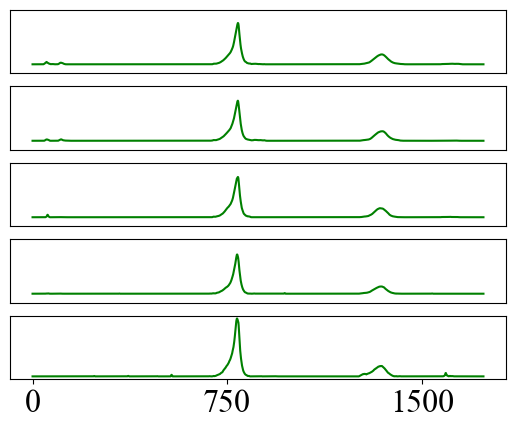

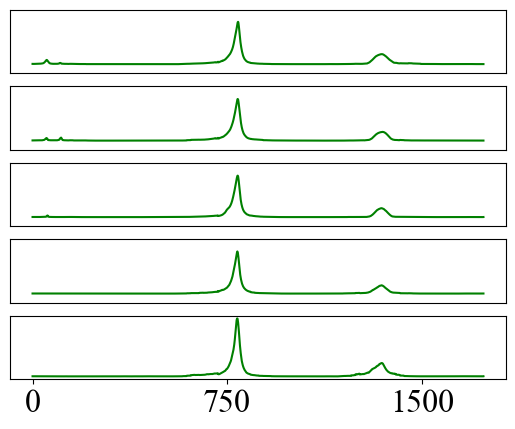

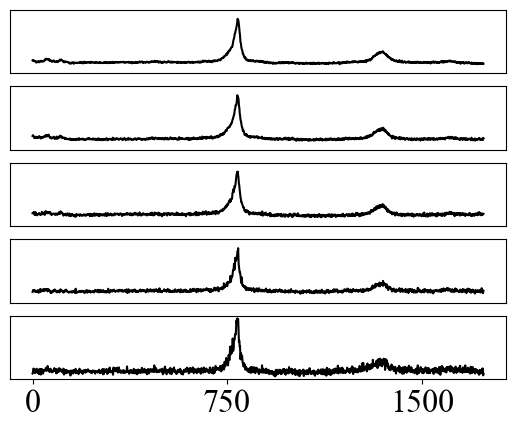

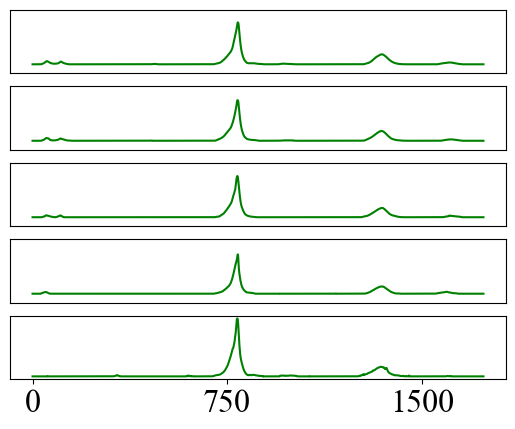

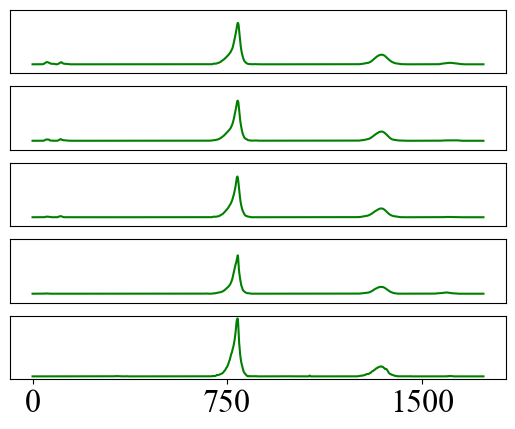

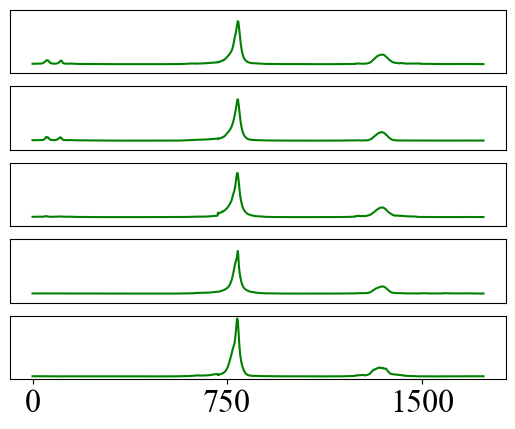

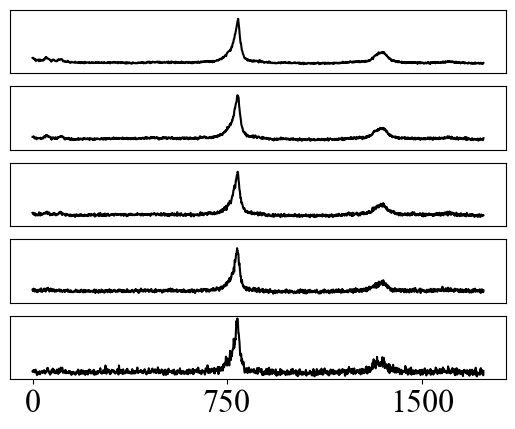

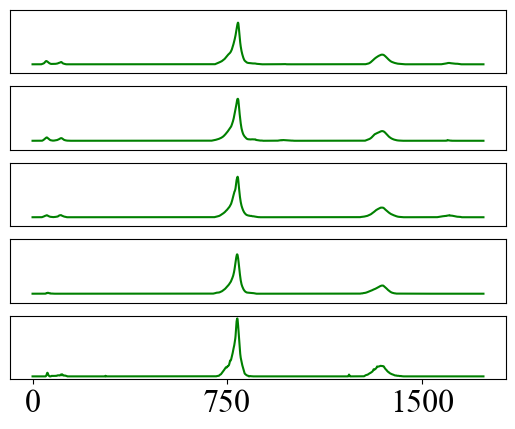

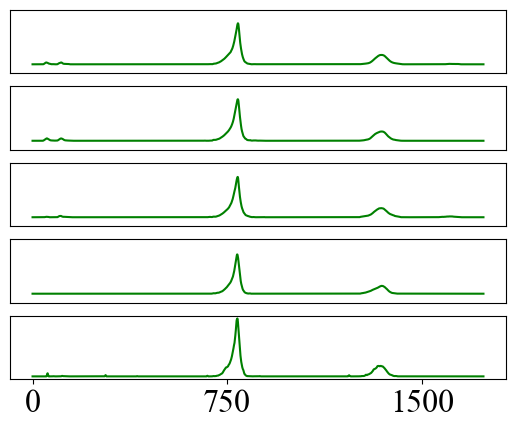

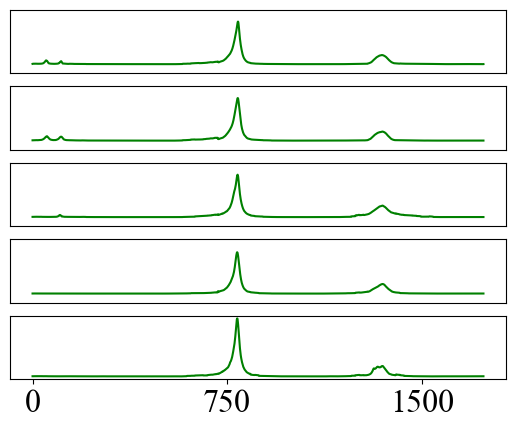

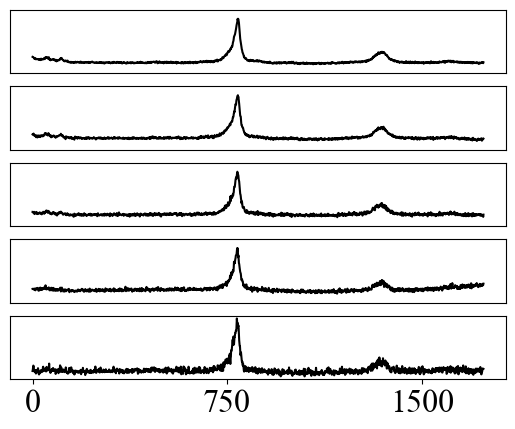

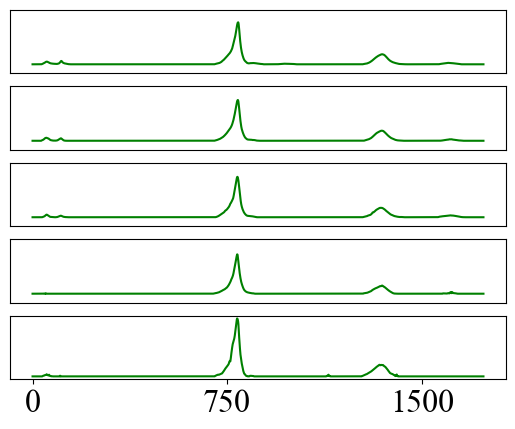

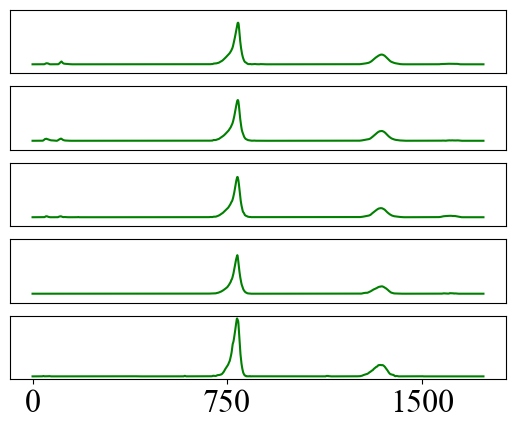

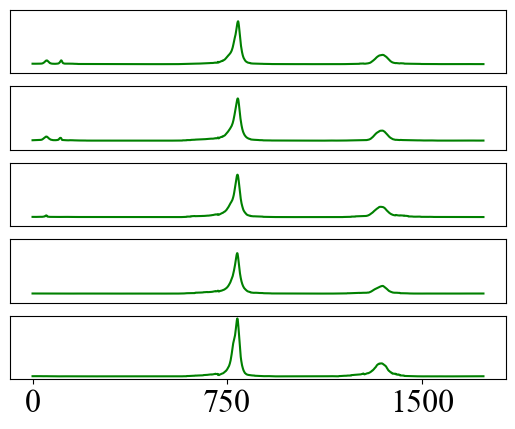

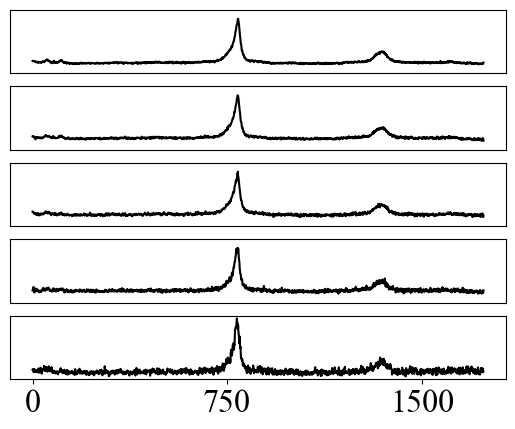

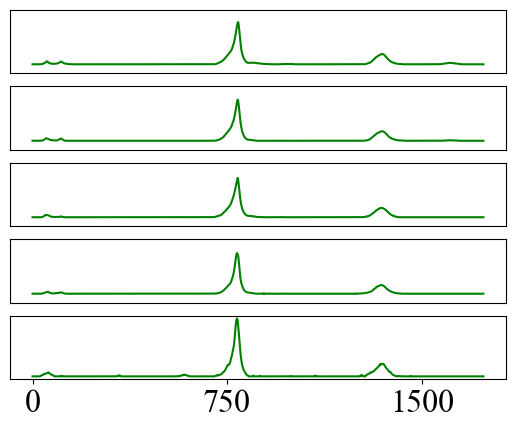

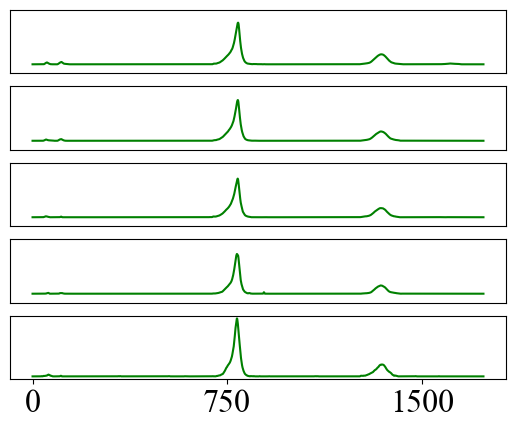

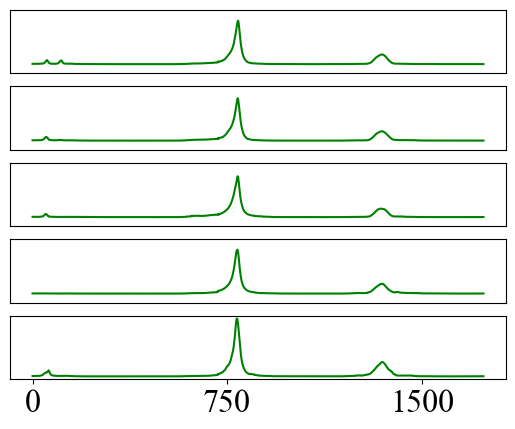

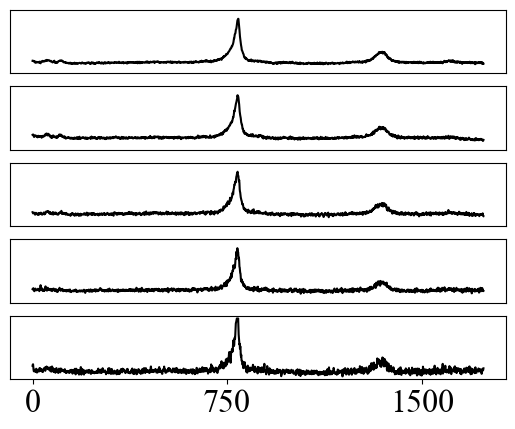

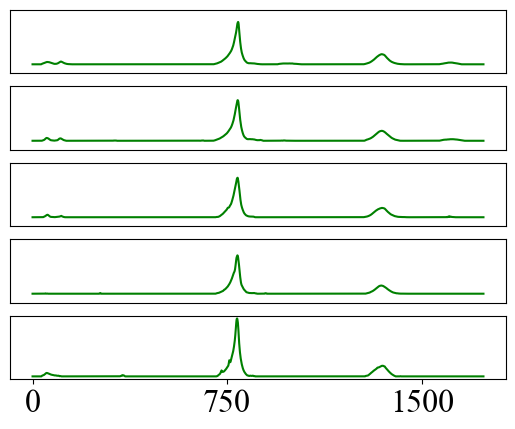

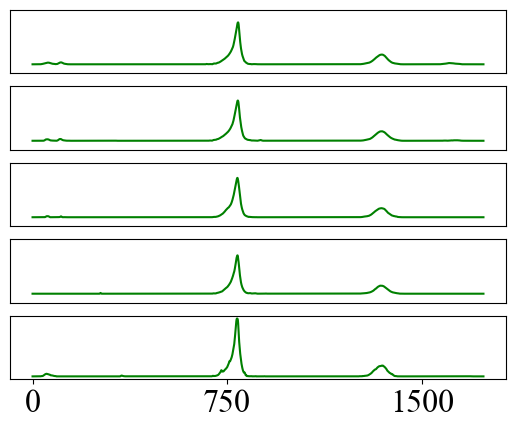

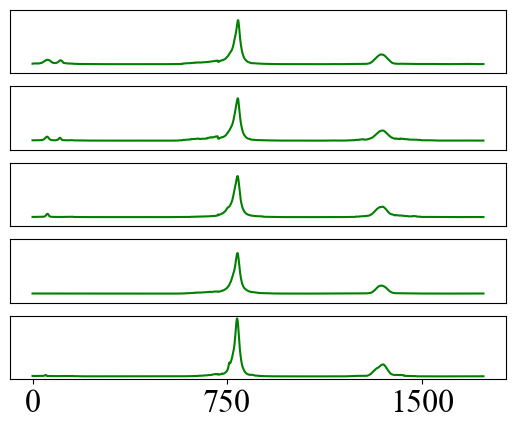

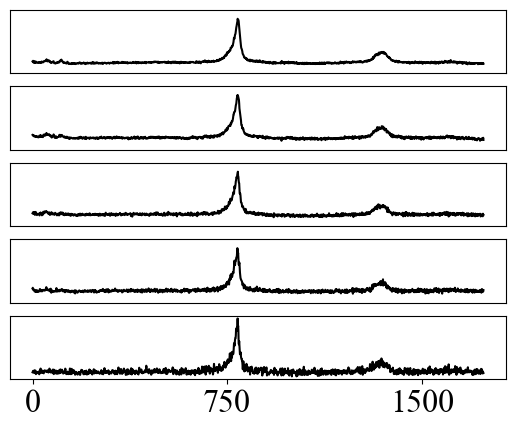

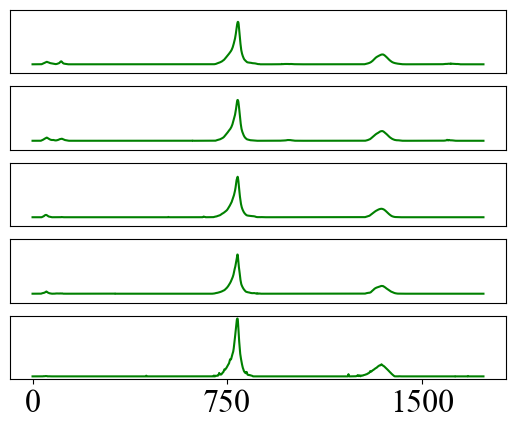

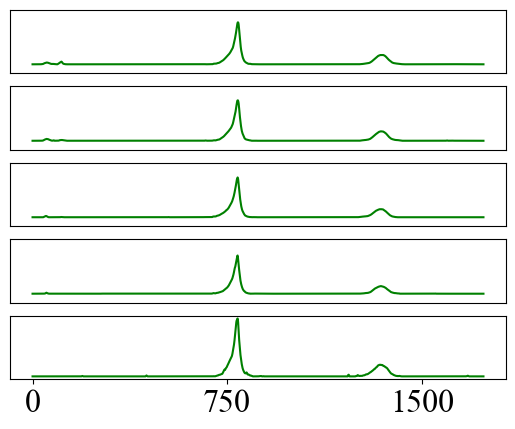

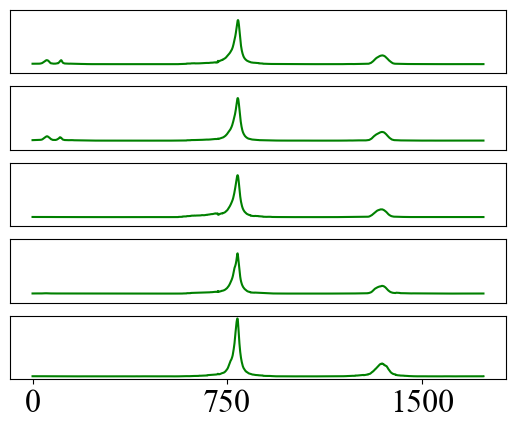

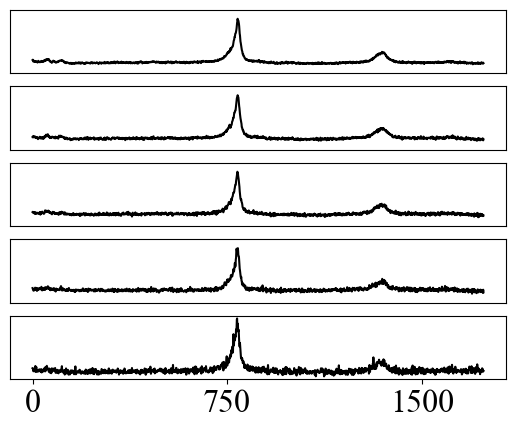

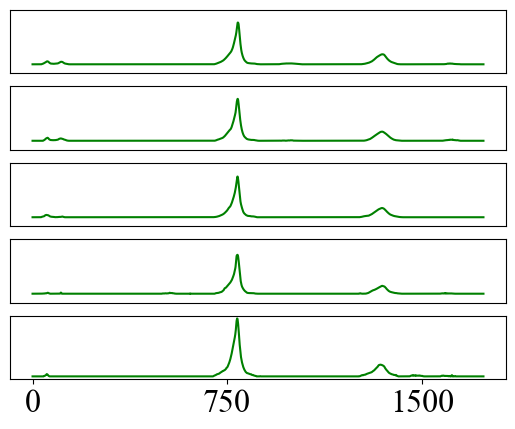

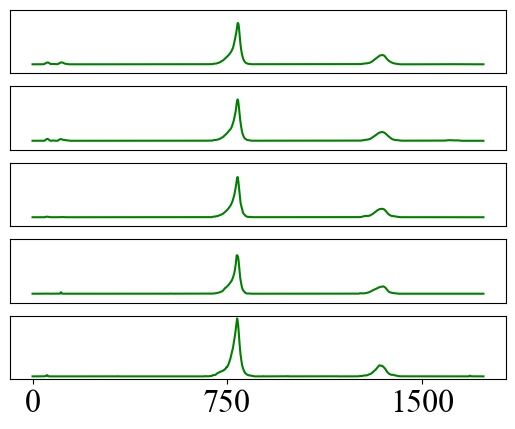

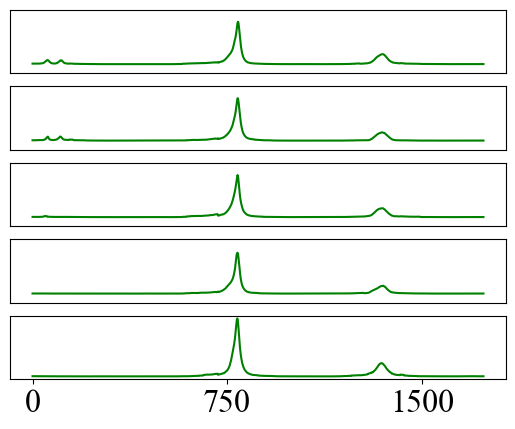

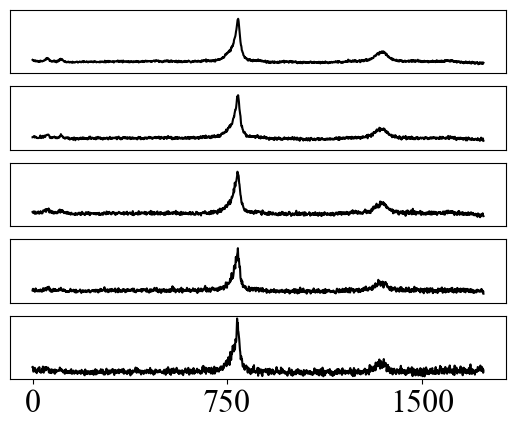

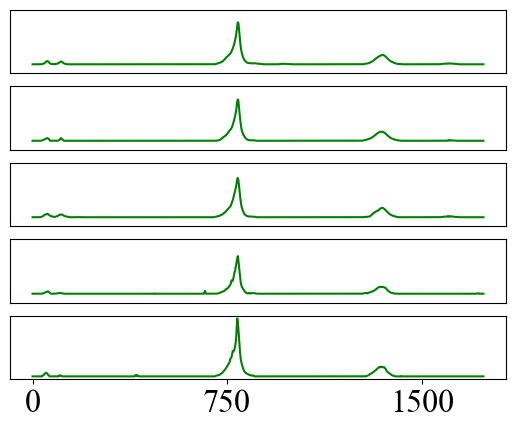

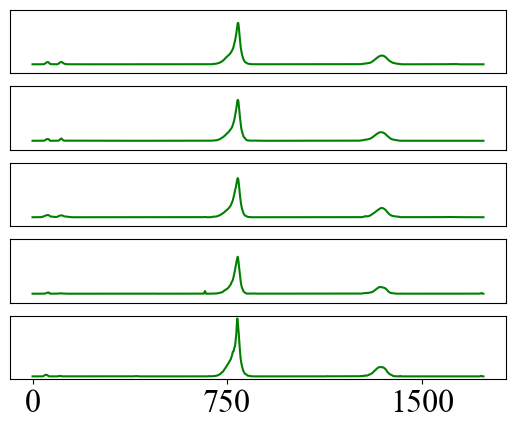

KeyboardInterrupt: 

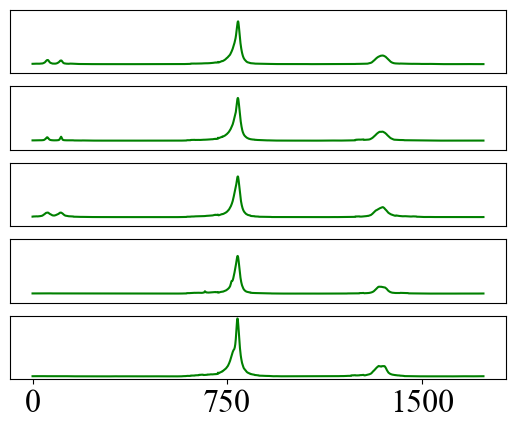

In [54]:
y_labels = []

plt.rcParams.update({'font.size': 23})
plt.rcParams["font.family"] = "Times New Roman"
for y in  data_names:
    y_labels.append(y[9: y.index("s")])

colors = ["Green"]*3

for spectrum in range(20):
    
    # Make a figure showing the different exposure time-spectra serving as input to the models
    #fig, axs = plt.subplots(len(data_names), sharex=False, sharey=False)
    fig, axs = plt.subplots(5, sharex=False, sharey=False)
    for en, n in enumerate(np.flip(data_names)[:5]):
        dn = np.squeeze(np.copy(data[-(en+1)])).reshape((-1, 1738))
        
        maxim = np.max(dn, axis = 1)
        # Normalize the spectrum such that maximum is 1
        dn = dn/ np.expand_dims(maxim, -1)

        axs[en].plot(dn[spectrum], color = "Black")
        
        axs[en].set_ylabel(np.flip(y_labels)[en], rotation=0, loc='bottom', labelpad=65)
        axs[en].set_xticks([])
        axs[en].set_yticks([])
        axs[en].set_ylim(-0.2, 1.2)
        
    plt.autoscale() 
    plt.xticks([0, 750, 1500])
    plt.savefig("Figures/SWCNTglassDenoising/" + str(spectrum) + "_Input.png",
               bbox_inches='tight', pad_inches=0.75)
    plt.show()
    
    
    names = ["Ensemble", "Standard", "Kazemzadeh et al."]
    names_ix = 0
    for p, c in zip([ensemble_preds, standard_preds, casc_preds], colors):
        #fig, axs = plt.subplots(len(data_names), sharex=False, sharey=False)
        fig, axs = plt.subplots(5, sharex=False, sharey=False)
        for en, n in enumerate(np.flip(data_names)[:5]):

            axs[en].plot(p[n][spectrum], color = c)
            axs[en].set_ylabel(np.flip(y_labels)[en], rotation=0, loc='bottom', labelpad=65)
            axs[en].set_xticks([])
            axs[en].set_yticks([])
            axs[en].set_ylim(-0.2, 1.2)
        plt.autoscale() 

        plt.xticks([0, 750, 1500])
        plt.savefig("Figures/SWCNTglassDenoising/" + str(spectrum) + "_"+names[names_ix]+".png",
                   bbox_inches='tight', pad_inches=0.75)
        names_ix += 1
        plt.show()

In [9]:
names = ["Ensemble", "Standard", "Kazemzadeh et al."]

metrics = []
for data_name, new_target in zip(data_names, targets):
    metrics.append([])
    
    print(data_name)
    names_ix = 0
    for p in [ensemble_preds, standard_preds, casc_preds]:

        # Divide by the maximum to better quantify errors between exposure times
        #(otherwise the score of the minimum exposure time looks like the best one, which is not the case!)
        maxim = np.max(new_target)
        #m = np.sqrt(np.mean(np.power(new_target/maxim - np.nan_to_num(p[data_name]/maxim), 2)))
        m = np.max(np.abs(new_target/maxim - np.nan_to_num(p[data_name]/maxim)))
        
        print(m)
        metrics[-1].append(m)
        names_ix += 1
    
metrics = np.array(metrics)
exp_times = []
for data_name in data_names:
    t = float(data_name[len("swcntglass"): len("swcntglass") + data_name[len("swcntglass"):].find("s")])
    exp_times.append(t)
exp_times = np.array(exp_times)
sorting = np.argsort(exp_times)

exp_times = exp_times[sorting]
metrics = metrics[sorting]

swcntglass0.00167s10umsize50umconfocal.h5
3.973717212677002
2.5839340686798096
3.9849023818969727
swcntglass0.00167s20umsize50umconfocal600hz.h5
5.2096848487854
4.108846784693752
4.915020682559774
swcntglass0.00174s20umsize50umconfocal575hz.h5
2.9377639073841118
2.5063816818678846
2.733709116135
swcntglass0.00182s20umsize50umconfocal550hz.h5
2.490832429260243
1.786141523149656
2.3794496059417725
swcntglass0.00190s20umsize50umconfocal525hz.h5
2.5290675381210233
1.6678624153137207
2.227792739868164
swcntglass0.00222s20umsize50umconfocal450hz.h5
2.1835496515796757
1.4831107970926212
1.8838902774812445
swcntglass0.00250s20umsize50umconfocal400hz.h5
1.9391503726518289
1.2483932320553928
1.6684007360531086
swcntglass0.00286s20umsize50umconfocal350hz.h5
1.654816620192532
1.0942969528391497
1.852518916130066
swcntglass0.002s20umsize50umconfocal500hz.h5
2.3361637592315674
1.402861981129682
2.0186149230307207
swcntglass0.00333s20umsize50umconfocal300hz.h5
1.7417317157573937
1.2039741163271311
1.

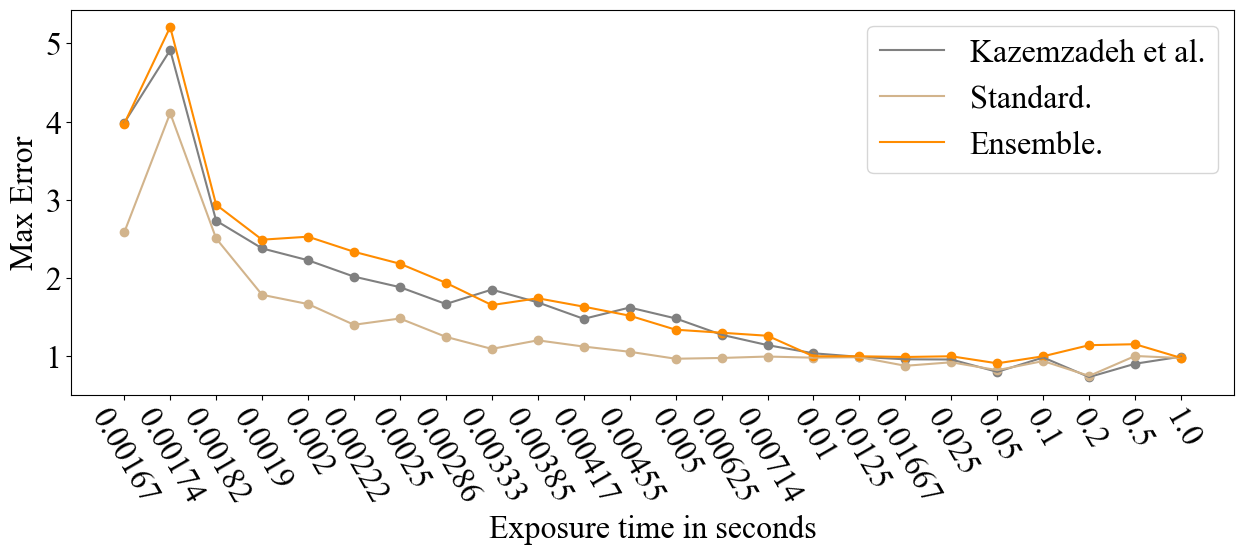

In [12]:
plt.rcParams.update({'font.size': 23})
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(figsize = (15, 5))

plt.plot(metrics[:-1, 2], color = "gray", label = "Kazemzadeh et al.")
plt.scatter(np.arange(len(metrics)-1), metrics[:-1, 2], color = "gray")

plt.plot(metrics[:-1, 1], color = "tan", label = "Standard.")
plt.scatter(np.arange(len(metrics)-1), metrics[:-1, 1], color = "tan")

plt.plot(metrics[:-1, 0], color = "darkorange", label = "Ensemble.")
plt.scatter(np.arange(len(metrics)-1), metrics[:-1, 0], color = "darkorange")

plt.xticks(np.arange(len(exp_times)-1), exp_times[1:], rotation = -60)
#plt.ylim([0, 0.6])
plt.xlabel("Exposure time in seconds")
#plt.ylabel("RMSE")
plt.ylabel("Max Error")
plt.legend()
plt.savefig("Figures/glassExposureTimeReduction.png",
                   bbox_inches='tight', pad_inches=0.75)
plt.show()

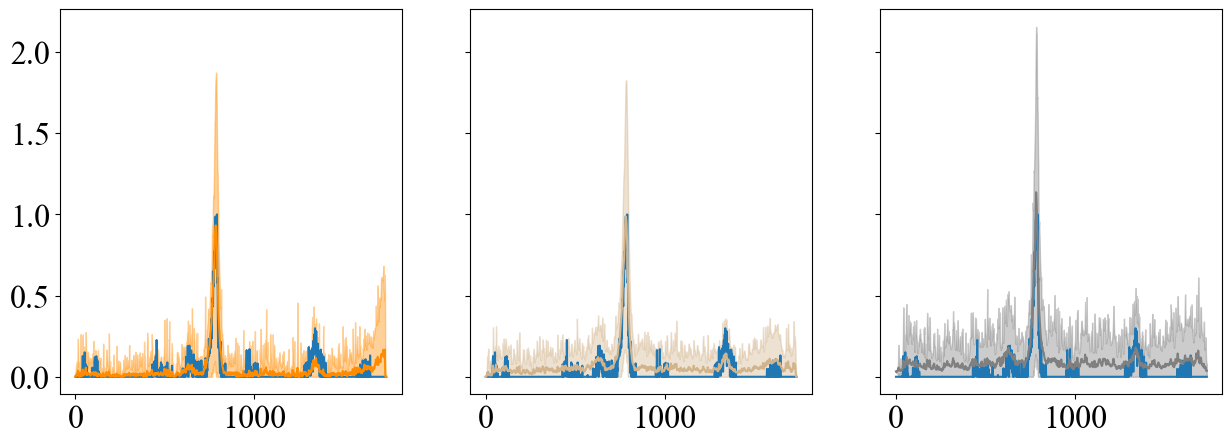

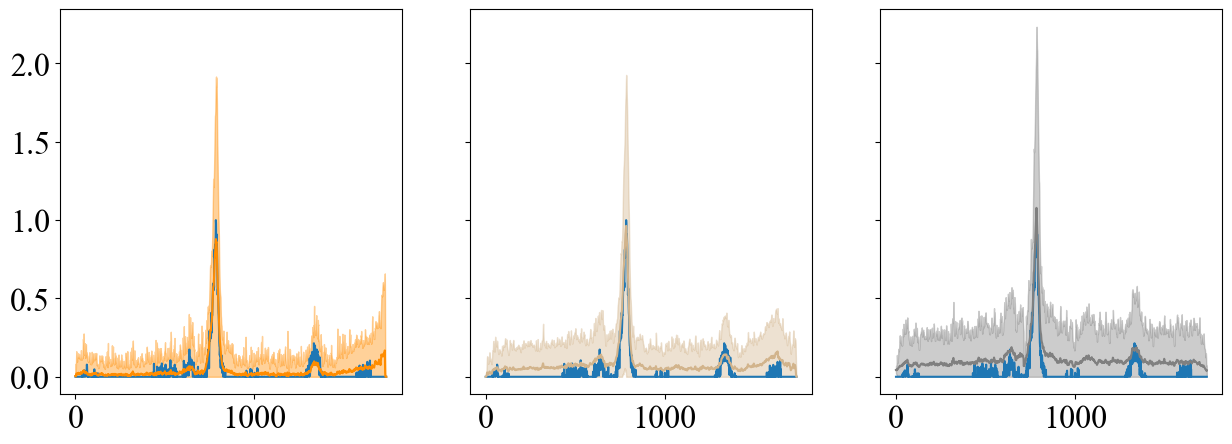

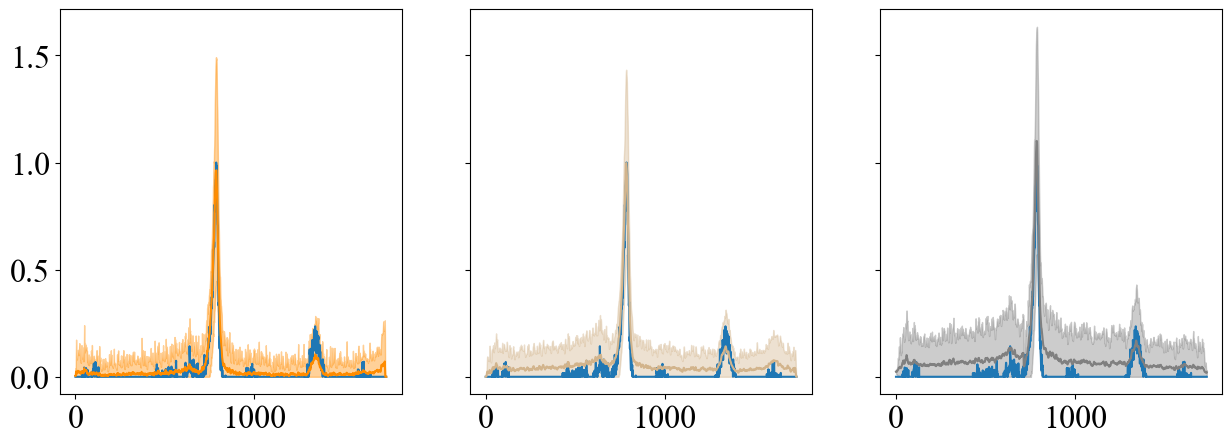

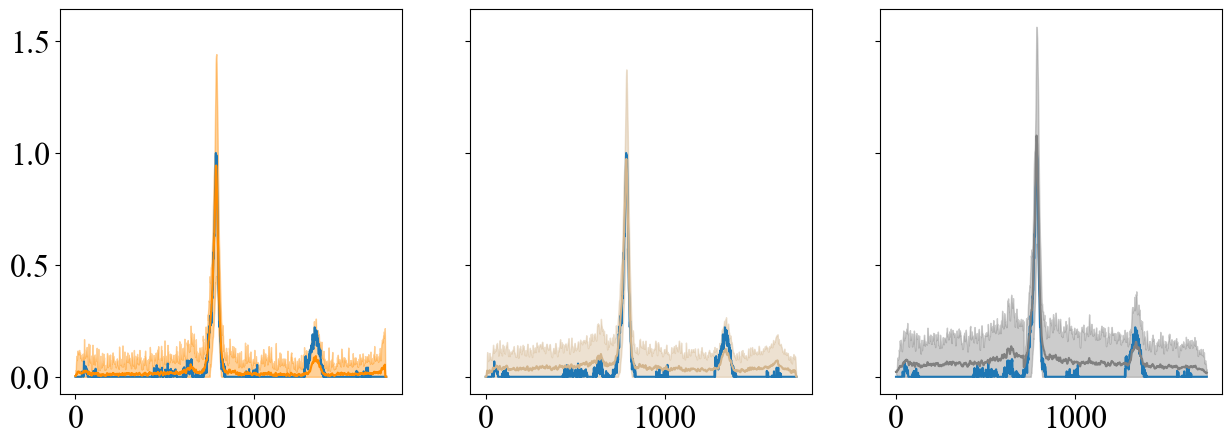

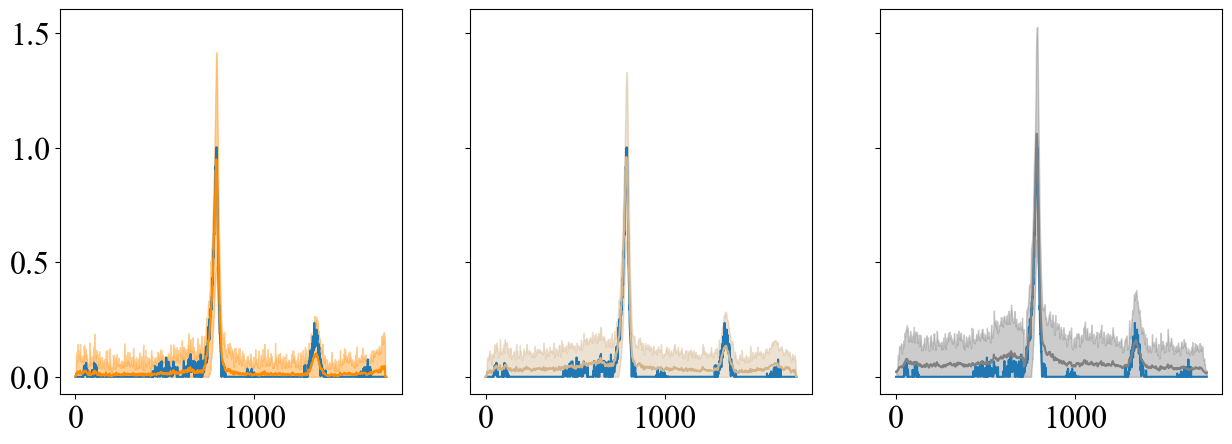

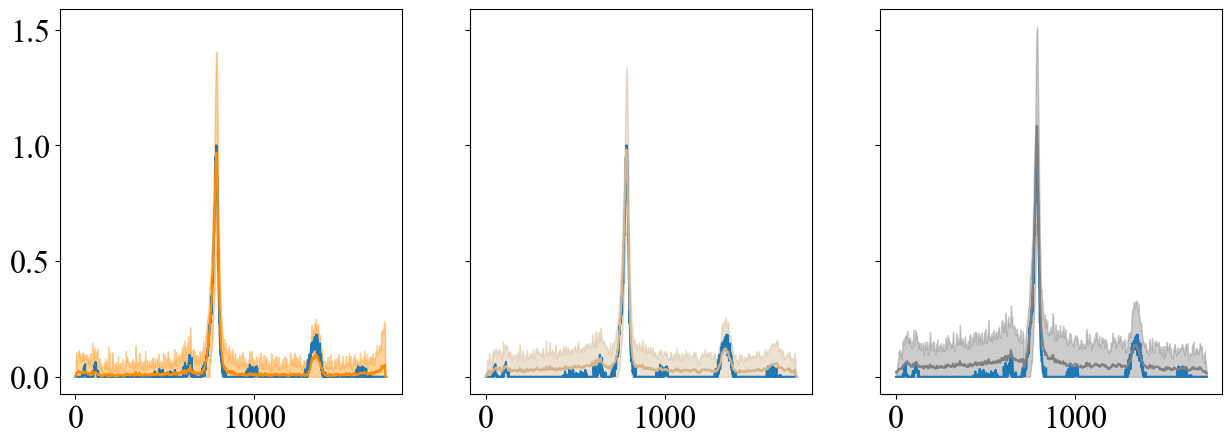

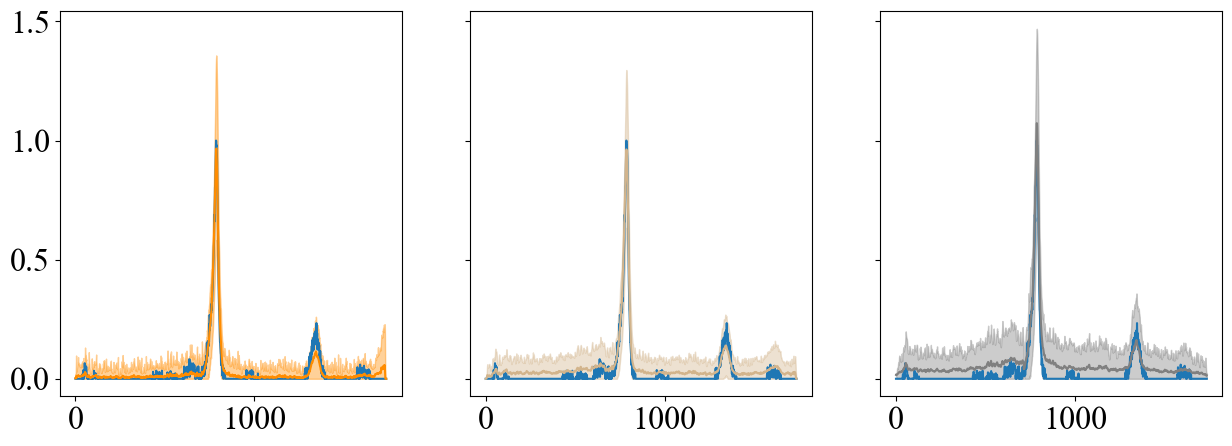

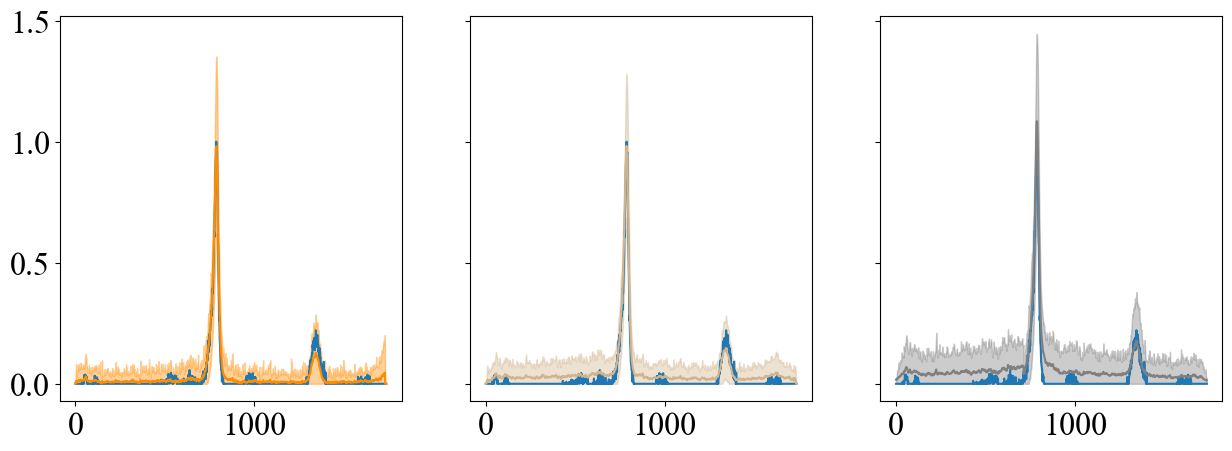

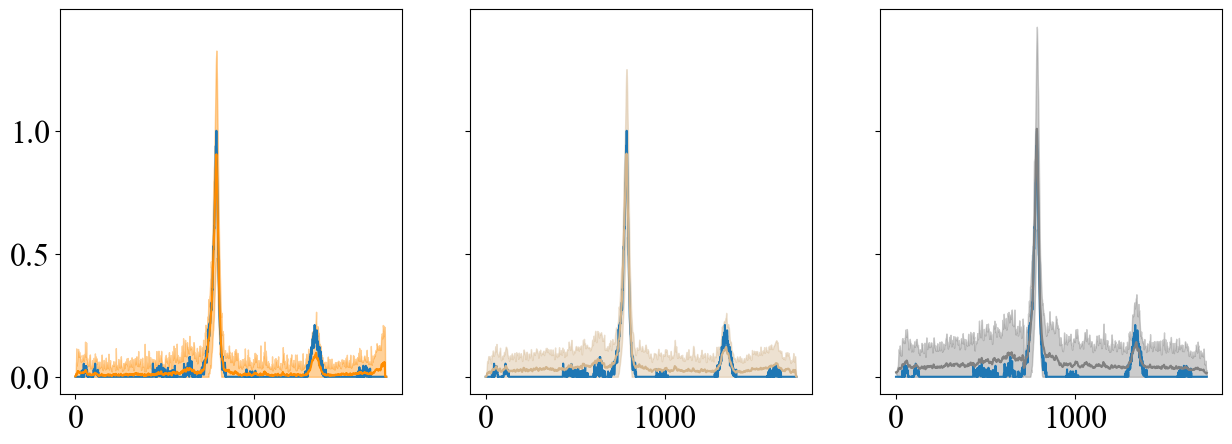

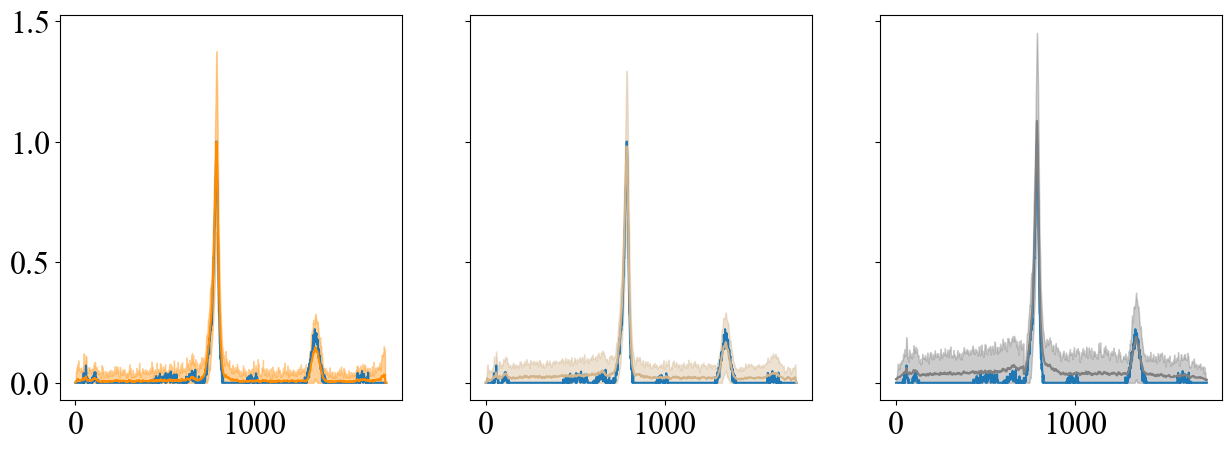

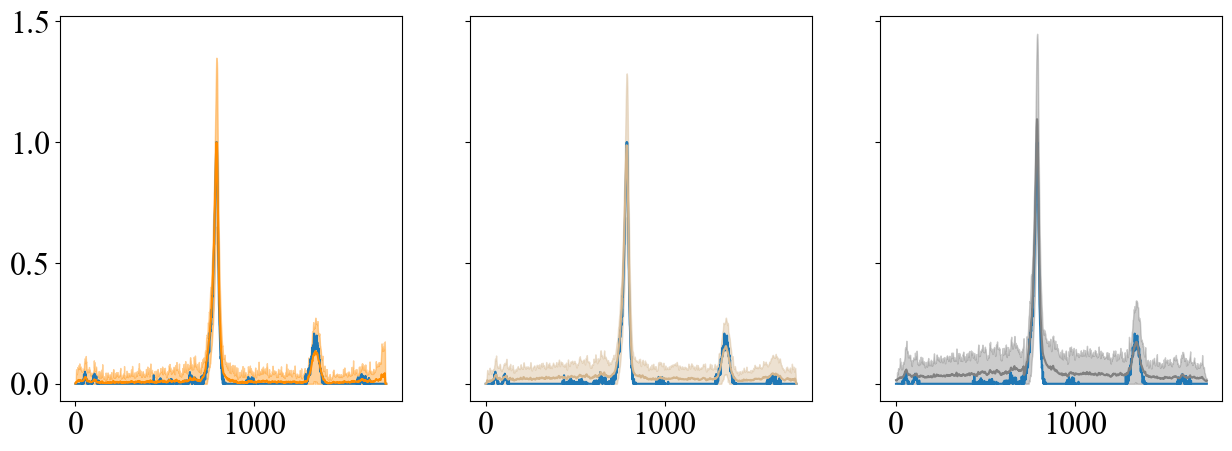

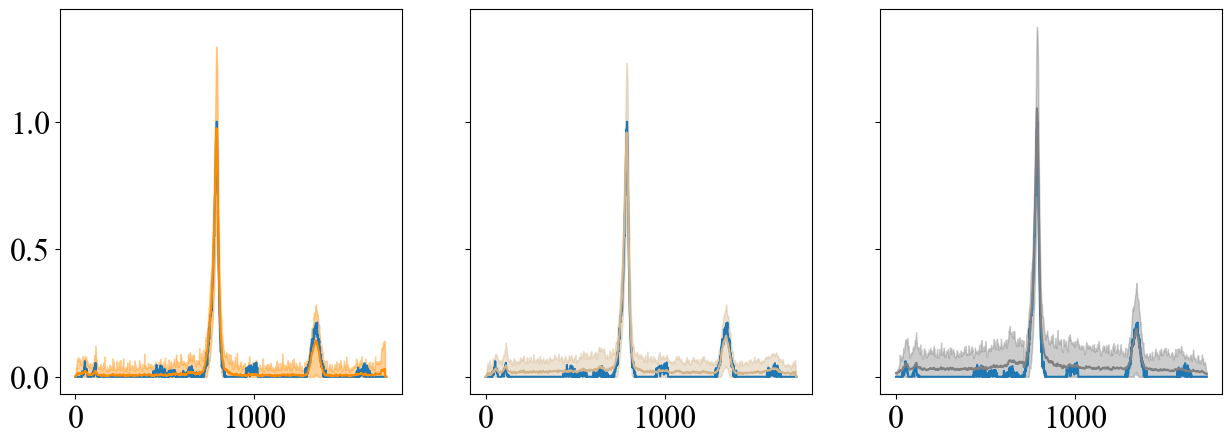

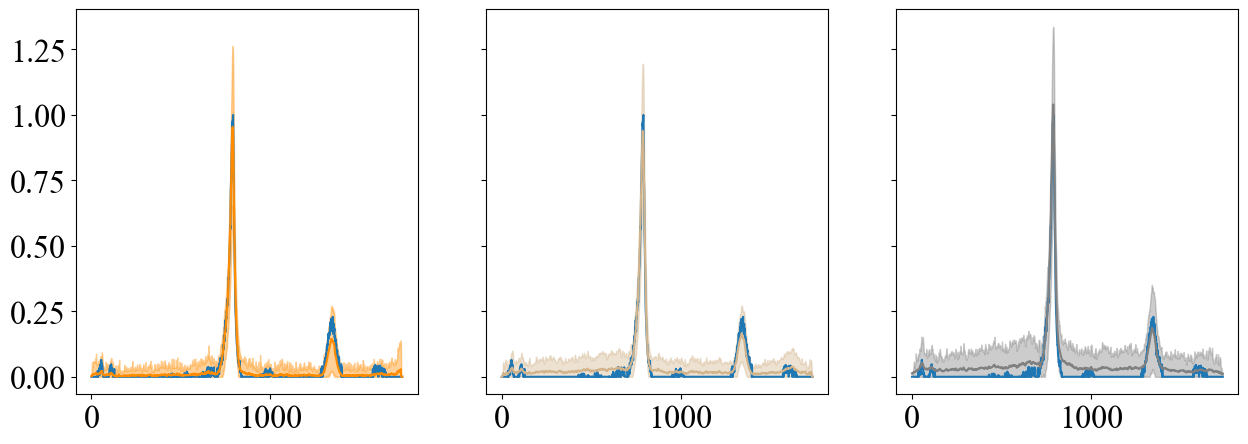

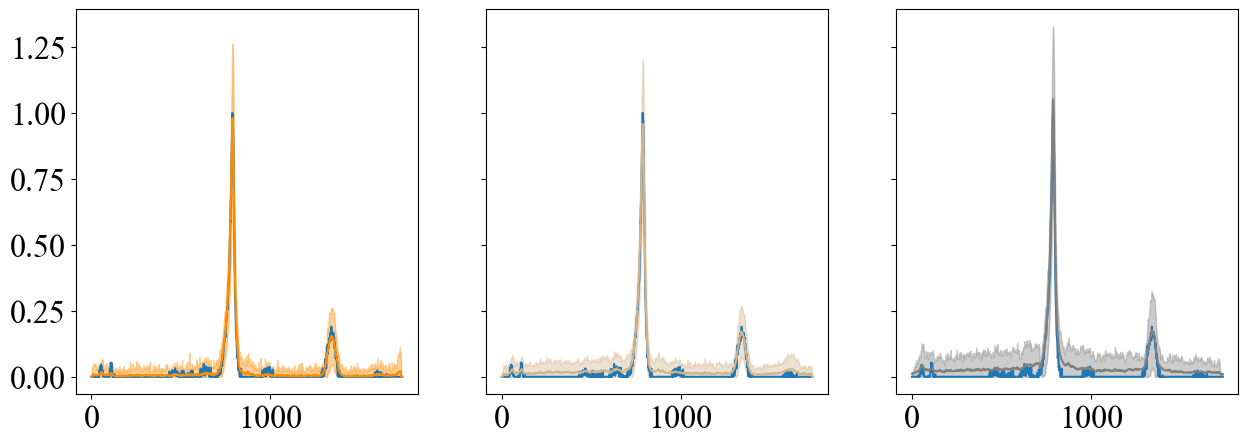

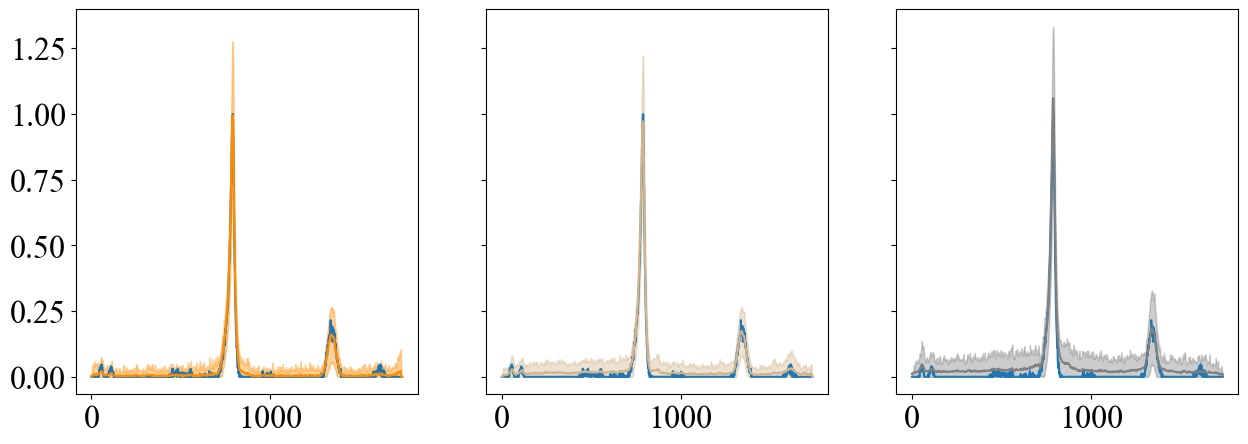

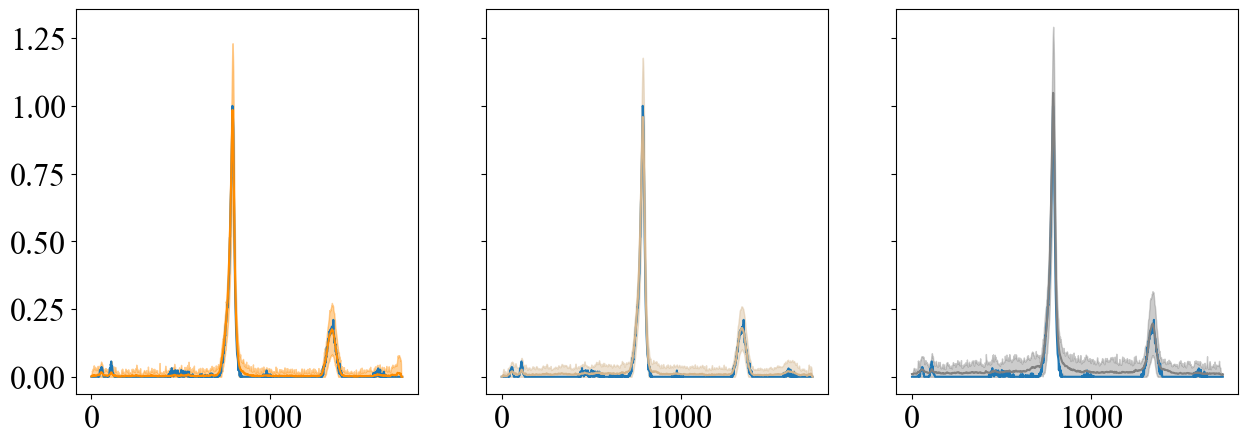

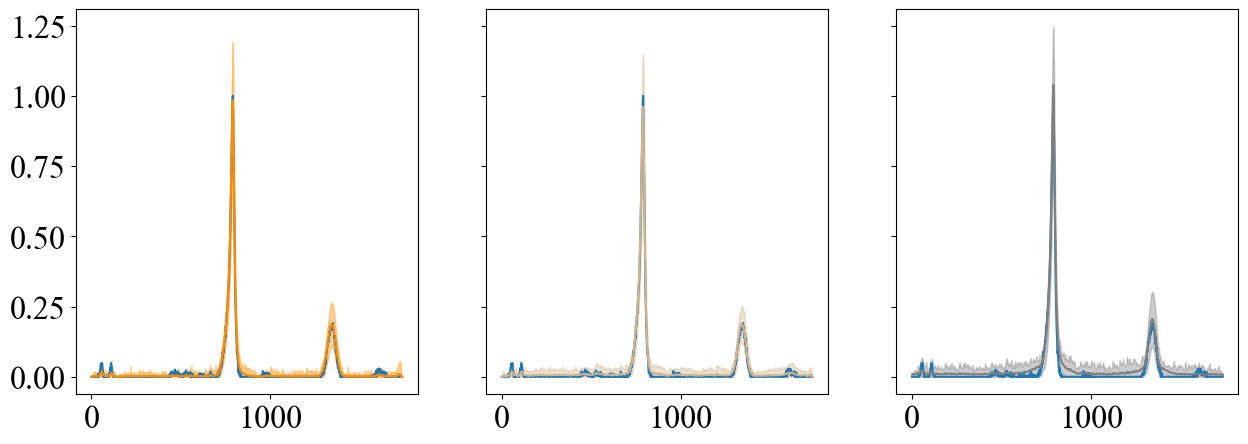

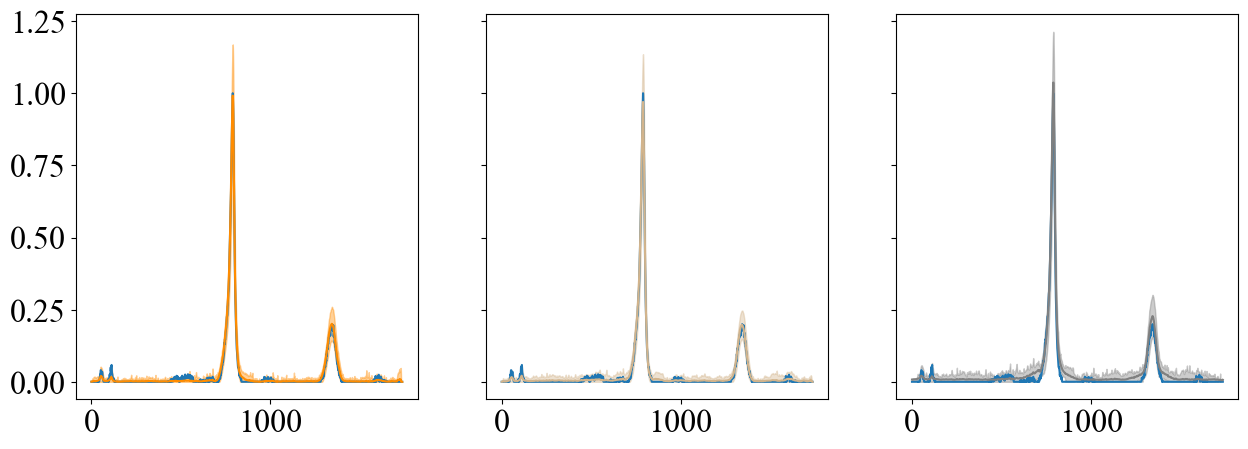

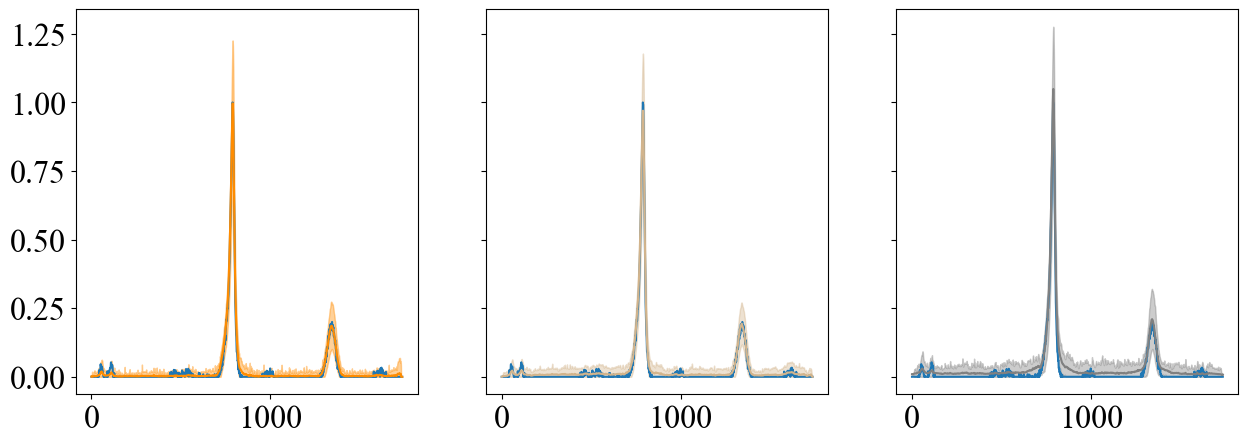

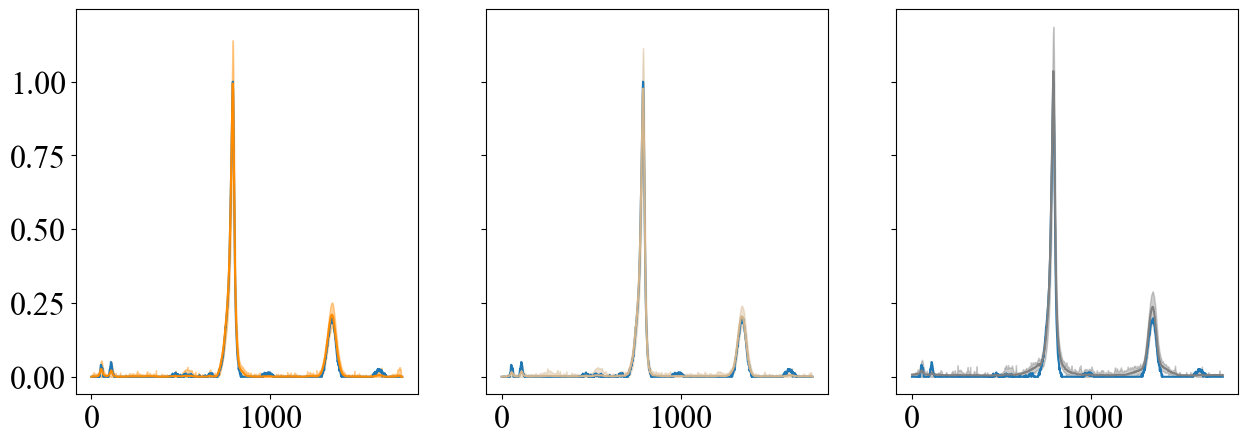

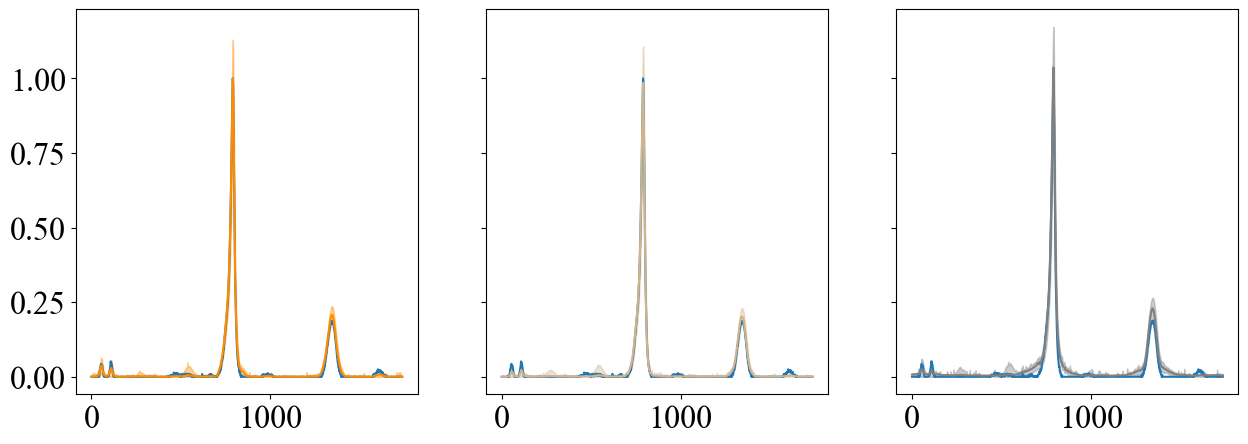

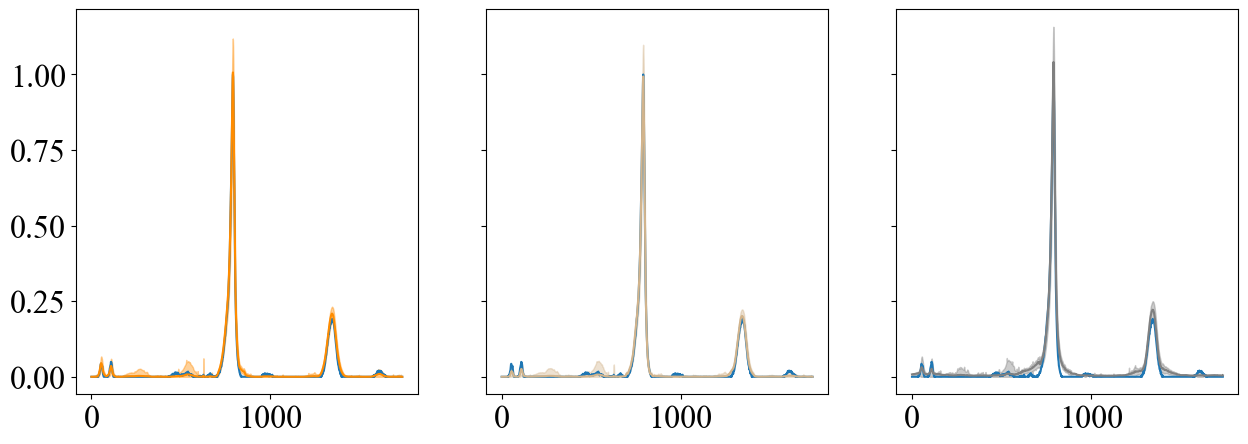

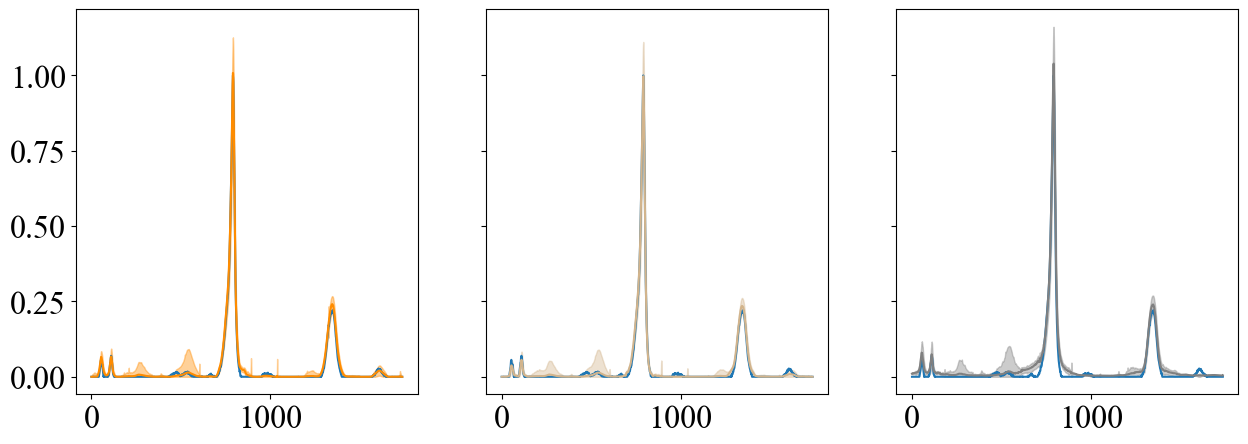

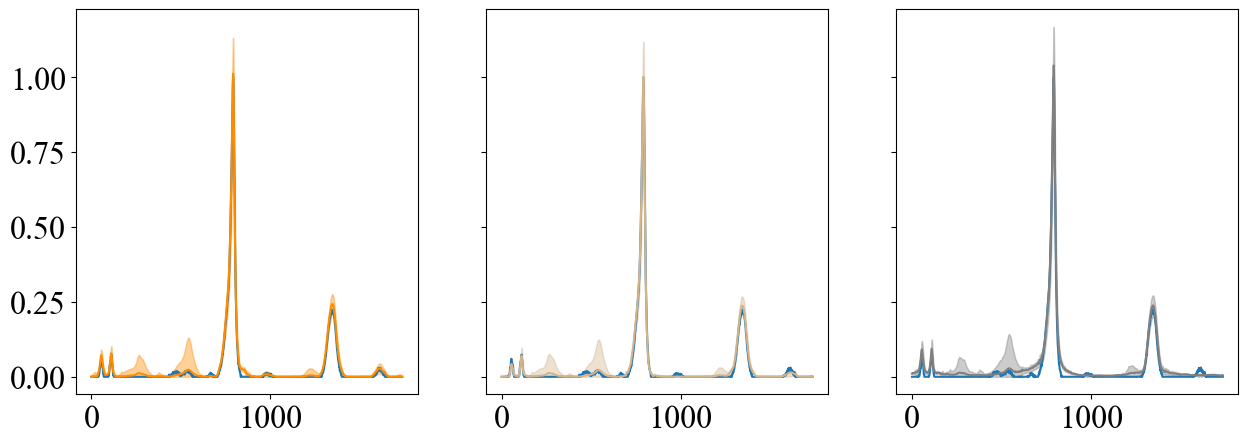

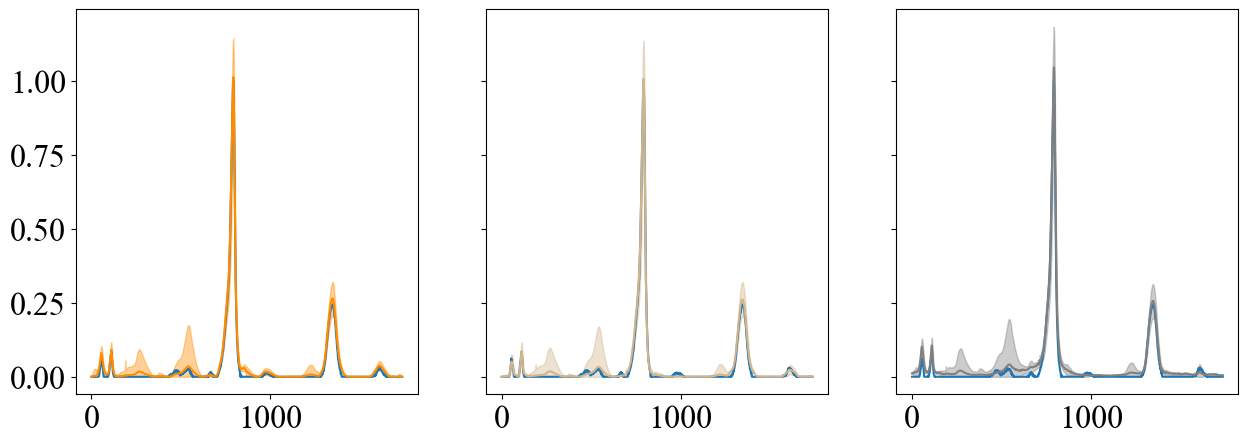

In [10]:
for t, n in zip(targets, data_names):
    
    maxim = np.max(t)
    
    fig, ax = plt.subplots(1, 3, figsize = (15, 5), sharey = True)
    
    ax[0].plot(t/maxim)
    mean = np.mean(ensemble_preds[n]/maxim, axis = 0)
    std = np.std(ensemble_preds[n]/maxim, axis = 0)
    ax[0].fill_between(np.arange(len(mean)), mean + std, np.clip(mean - std, 0, 1), color = "darkorange", alpha = 0.4)
    ax[0].plot(mean, color = "darkorange")

    
    ax[1].plot(t/maxim)
    mean = np.mean(standard_preds[n]/maxim, axis = 0)
    std = np.std(standard_preds[n]/maxim, axis = 0)
    ax[1].fill_between(np.arange(len(mean)), mean + std, np.clip(mean - std, 0, 1), color = "tan", alpha = 0.4)
    ax[1].plot(mean, color = "tan")

    
    ax[2].plot(t/maxim)
    mean = np.mean(casc_preds[n]/maxim, axis = 0)
    std = np.std(casc_preds[n]/maxim, axis = 0)
    ax[2].fill_between(np.arange(len(mean)), mean + std, np.clip(mean - std, 0, 1), color = "gray", alpha = 0.4)
    ax[2].plot(mean, color = "gray")
    #plt.ylim([-0.05, 1.1])
    plt.show()

swcntglass0.00167s10umsize50umconfocal.h5
(1, 1738)


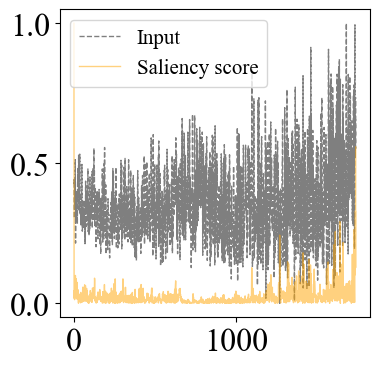

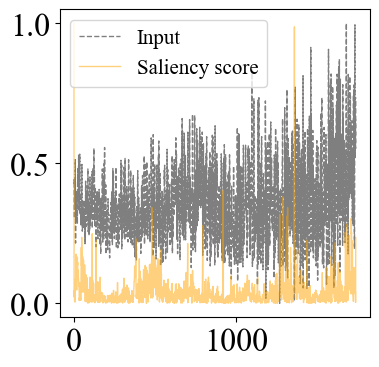

swcntglass0.00167s20umsize50umconfocal600hz.h5
(1, 1738)


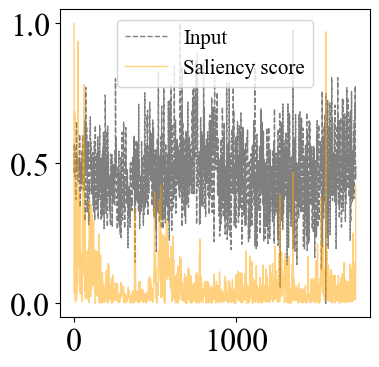

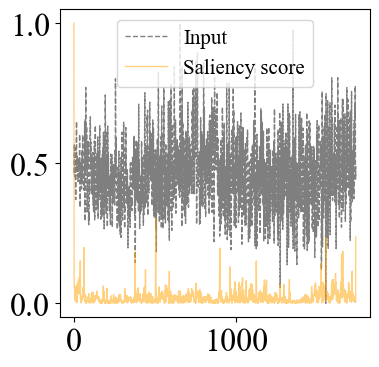

swcntglass0.00174s20umsize50umconfocal575hz.h5
(1, 1738)


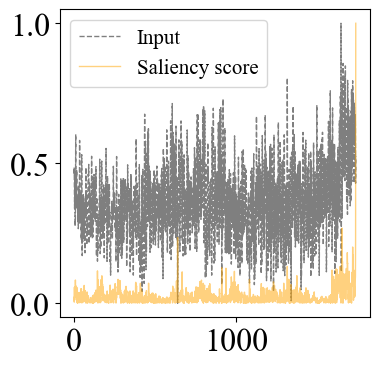

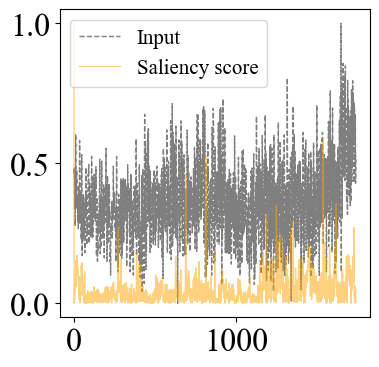

swcntglass0.00182s20umsize50umconfocal550hz.h5
(1, 1738)


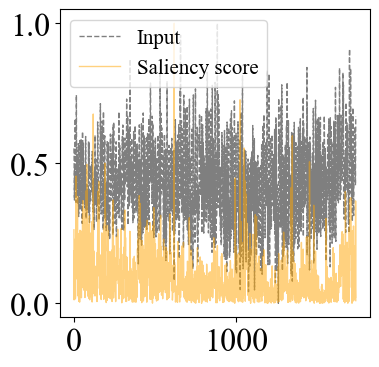

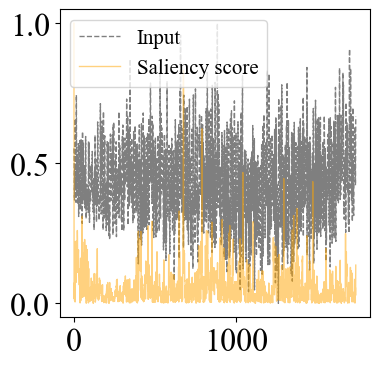

swcntglass0.00190s20umsize50umconfocal525hz.h5
(1, 1738)


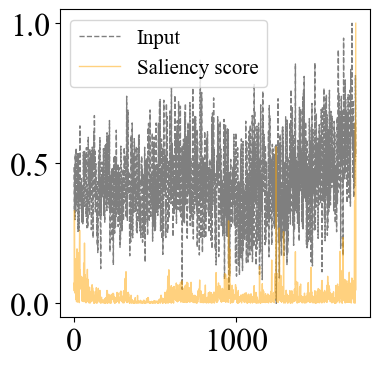

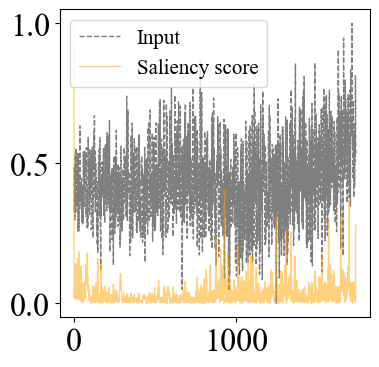

swcntglass0.00222s20umsize50umconfocal450hz.h5
(1, 1738)


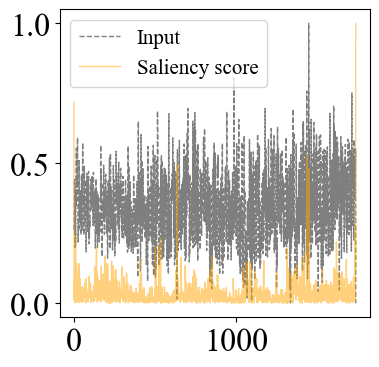

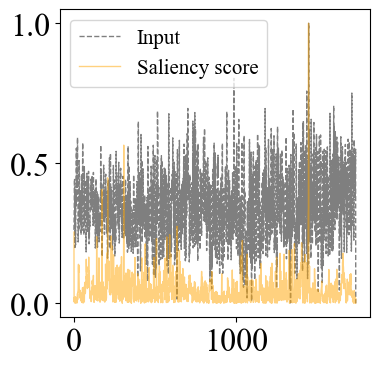

swcntglass0.00250s20umsize50umconfocal400hz.h5
(1, 1738)


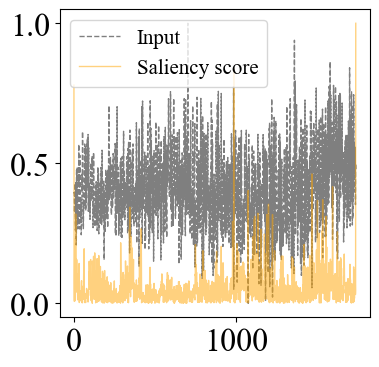

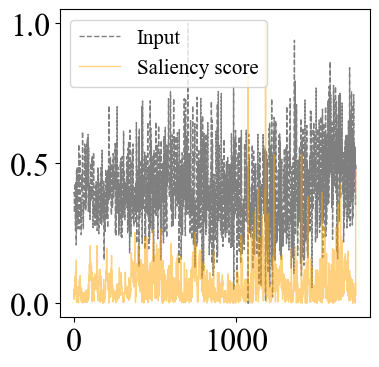

swcntglass0.00286s20umsize50umconfocal350hz.h5
(1, 1738)


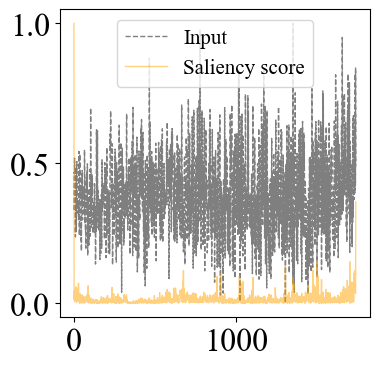

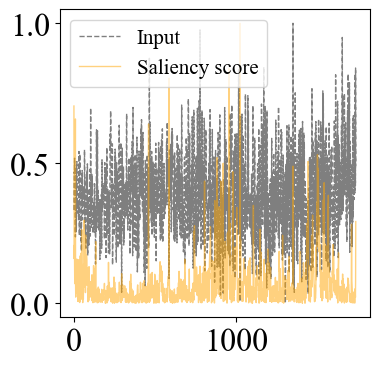

swcntglass0.002s20umsize50umconfocal500hz.h5
(1, 1738)


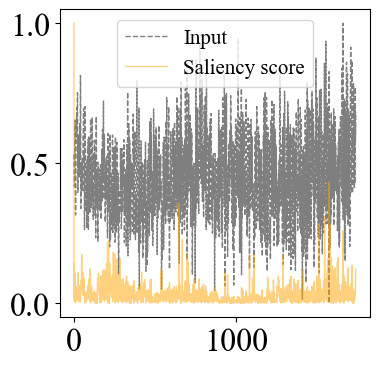

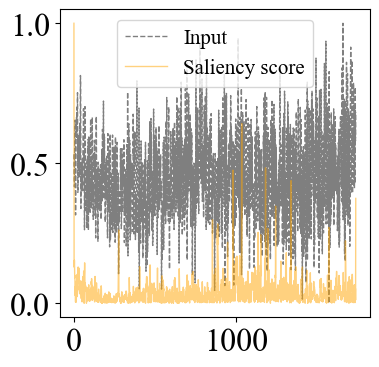

swcntglass0.00333s20umsize50umconfocal300hz.h5
(1, 1738)


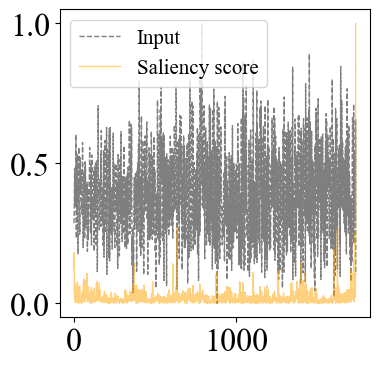

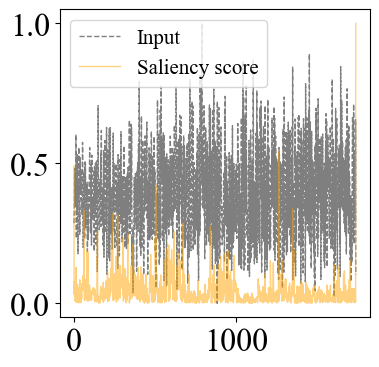

swcntglass0.00385s20umsize50umconfocal260hz.h5
(1, 1738)


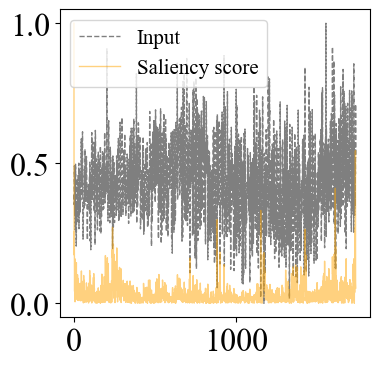

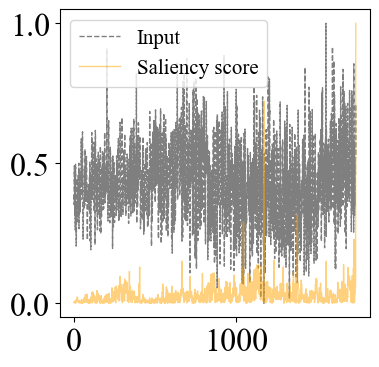

swcntglass0.00417s20umsize50umconfocal240hz.h5
(1, 1738)


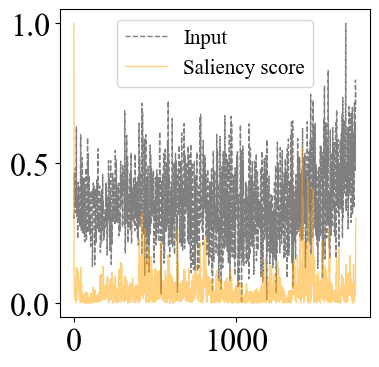

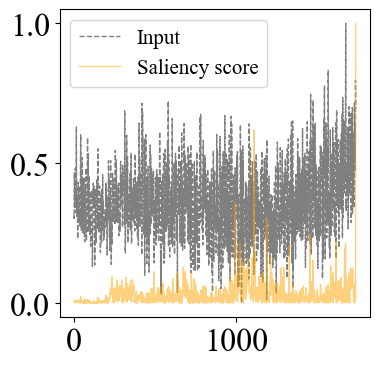

swcntglass0.00455s20umsize50umconfocal220hz.h5
(1, 1738)


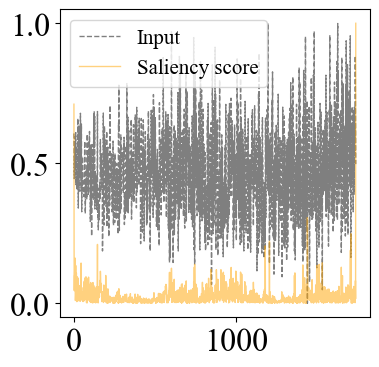

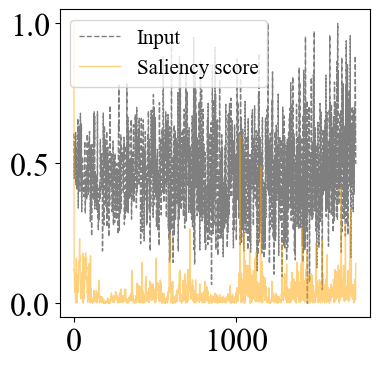

swcntglass0.005s20umsize50umconfocal200hz.h5
(1, 1738)


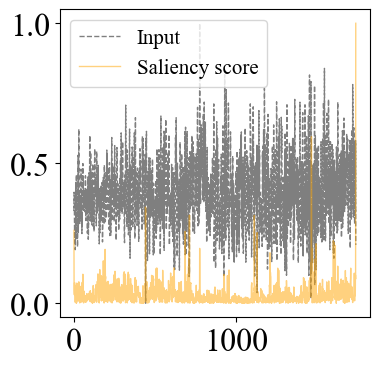

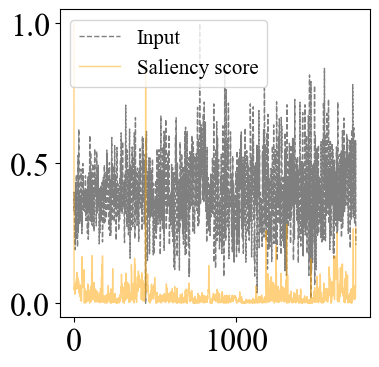

swcntglass0.00625s20umsize50umconfocal160hz.h5
(1, 1738)


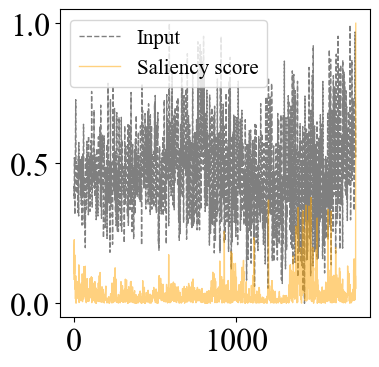

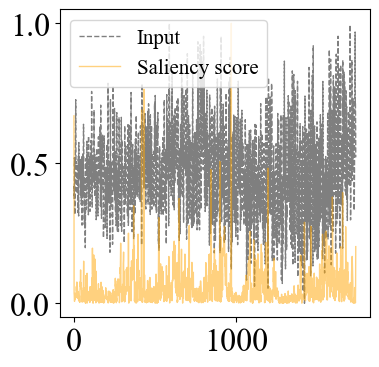

swcntglass0.00714s20umsize50umconfocal140hz.h5
(1, 1738)


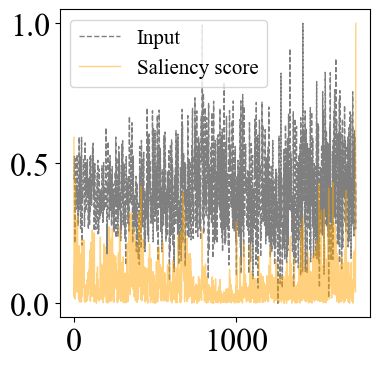

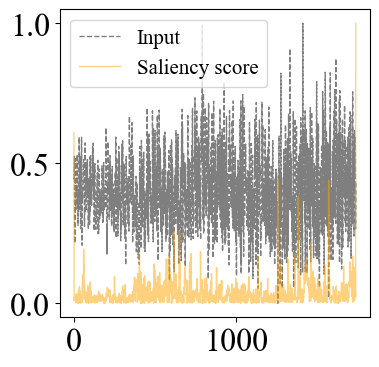

swcntglass0.0125s20umsize50umconfocal80hz.h5
(1, 1738)


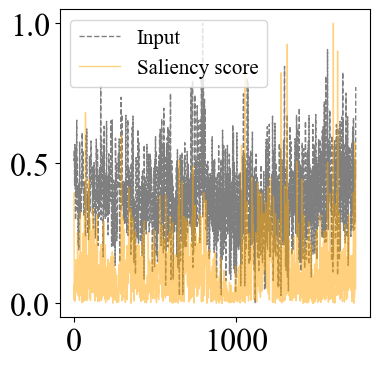

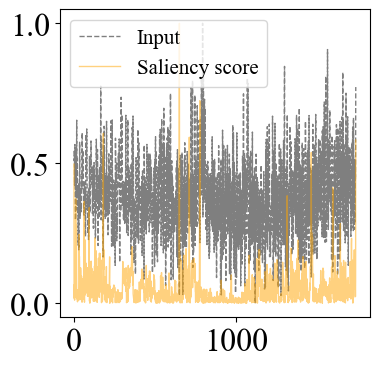

swcntglass0.01667s20umsize50umconfocal60hz.h5
(1, 1738)


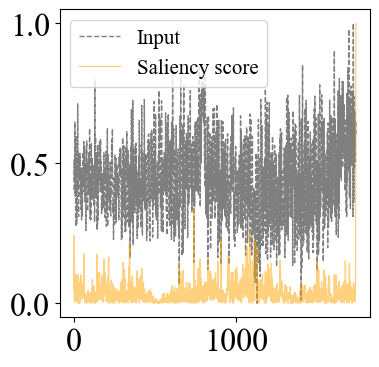

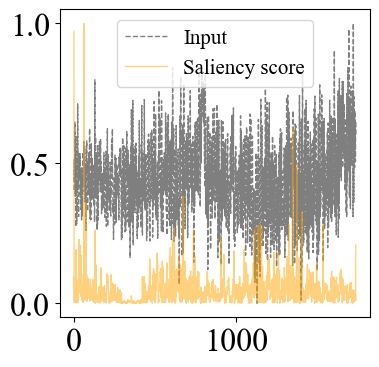

swcntglass0.01s20umsize50umconfocal100hz.h5
(1, 1738)


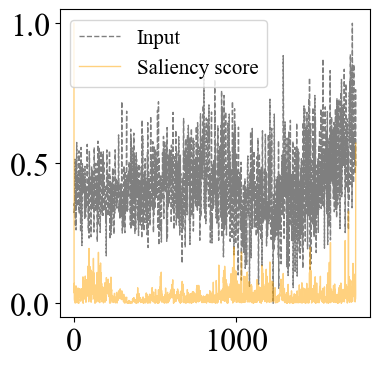

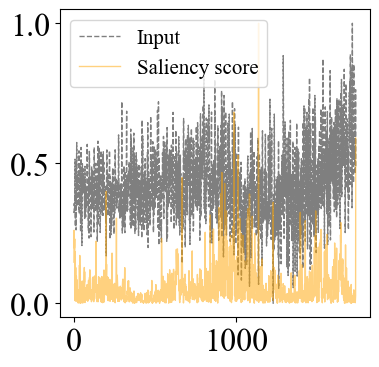

swcntglass0.025s20umsize50umconfocal40hz.h5
(1, 1738)


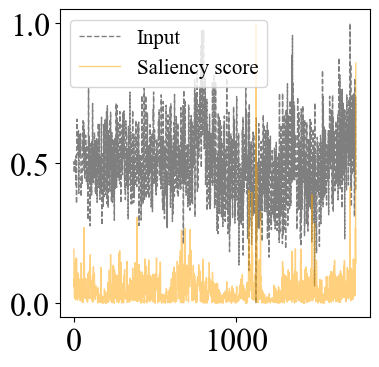

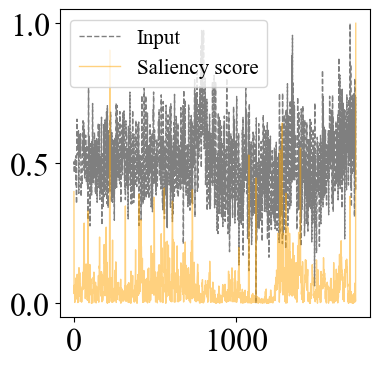

swcntglass0.05s20umsize50umconfocal20hz.h5
(1, 1738)


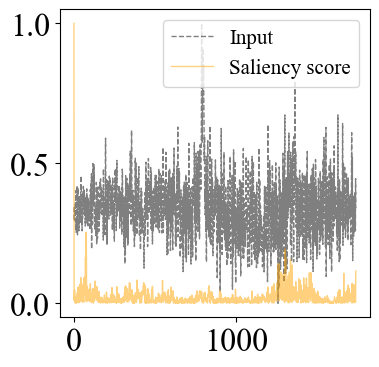

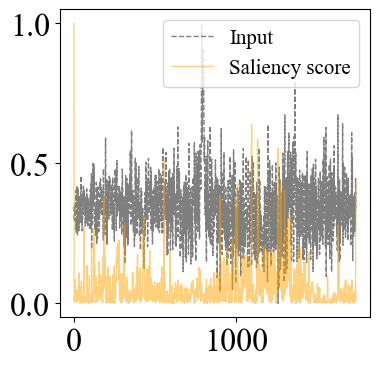

swcntglass0.1s20umsize50umconfocal10hz.h5
(1, 1738)


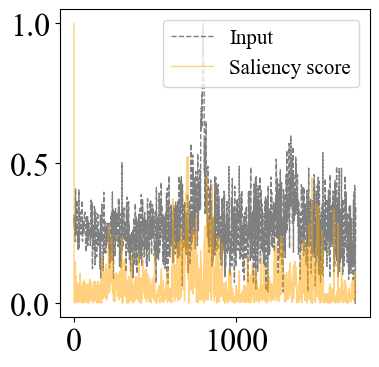

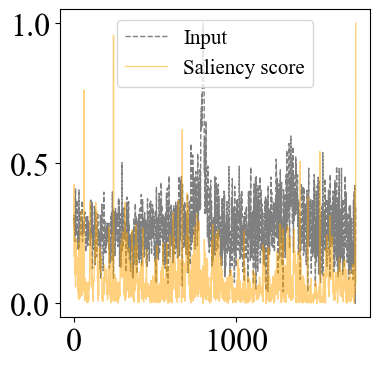

swcntglass0.2s20umsize50umconfocal5hz.h5
(1, 1738)


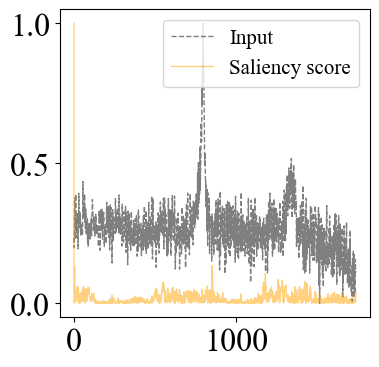

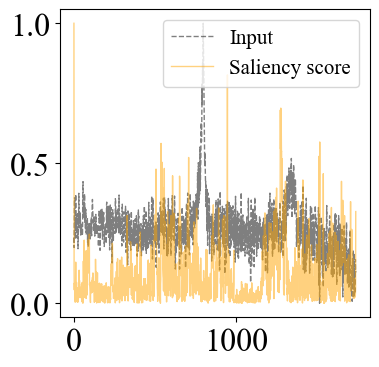

swcntglass0.5s20umsize50umconfocal2hz.h5
(1, 1738)


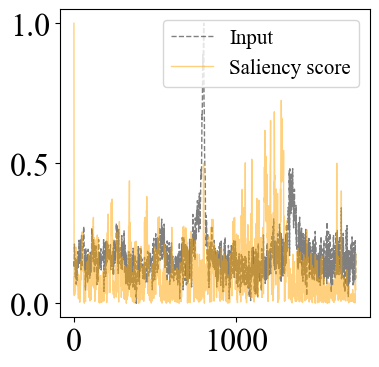

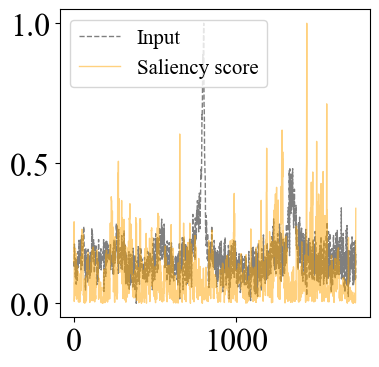

swcntglass1s20umsize50umconfocal1hz.h5
(1, 1738)


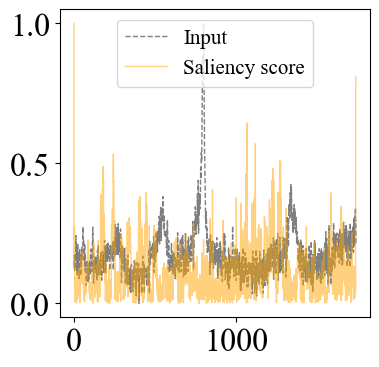

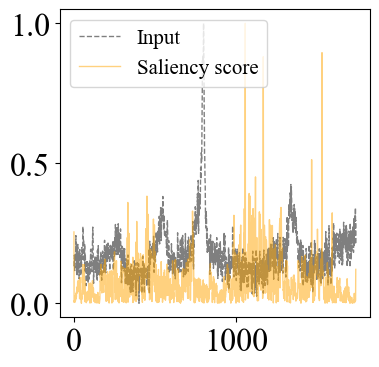

In [11]:
plt.rcParams.update({'font.size': 23})
plt.rcParams["font.family"] = "Times New Roman"
for d, n in zip(data, data_names):
    print(n)
        
    dn = np.copy(d.reshape((-1, 1738)))

    dn = dn[np.sum(dn, axis = 1) != 0.0]

    inp = tf.constant(dn[:1])

    
    with tf.GradientTape() as tape:
        
        tape.watch(inp)
        result = ensemble_model(inp)[-1]

        grads = tape.gradient(result, inp)
        print(grads.numpy().shape)
        out = grads.numpy()
        out = np.abs(out/np.max(np.abs(out)))
        
        plt.figure(figsize=(4, 4))
        #plt.plot(np.mean(np.squeeze(out), axis = 0), alpha = 0.5, linewidth = 1)
        #plt.plot(np.mean(dn[:100], axis = 0), alpha = 0.5, linestyle = "--", linewidth = 1)
        plt.plot(dn[0], alpha = 0.5, linestyle = "--", linewidth = 1, color = "Black", label = "Input")
        plt.plot(np.squeeze(out), alpha = 0.5, linewidth = 1, color = "Orange", label = "Saliency score")
        
        plt.savefig("Figures/GlassSalMap_ensemble_" + n +".png", transparent = True,
                   bbox_inches='tight', pad_inches=0.75)
        plt.legend(fontsize = 15)
        plt.show()


    with tf.GradientTape() as tape:
        
        tape.watch(inp)
        result = standard_model(inp)[-1]

        grads = tape.gradient(result, inp)
        out = grads.numpy()
        out = np.abs(out/np.max(np.abs(out)))
        
        plt.figure(figsize=(4, 4))
        plt.plot(dn[0], alpha = 0.5, linestyle = "--", linewidth = 1, color = "Black", label = "Input")
        plt.plot(np.squeeze(out), alpha = 0.5, linewidth = 1, color = "Orange", label = "Saliency score")
        plt.savefig("Figures/GlassSalMap_standard_" + n +".png", transparent = True,
                   bbox_inches='tight', pad_inches=0.75)
        plt.legend(fontsize = 15)
        plt.show()
    